<img src="https://editor.analyticsvidhya.com/uploads/76889recommender-system-for-movie-recommendation.jpg">

# Phase 1

## Introduction to the project

<p style="font-size:15px">In todays day and age people live in a extremely dynamic and busy world. With the never-ending tasks they have at hand the last thing they would want is to spend more of their cognitive resources on deciding what media they should consume in their free time. This is where recommendation systems come into play.</p>
<p style="font-size:15px">Recommendation systems are AI based algorithms that assess possible similarities between items and create a customized result that would be relevant to the received input.</p>
<p style="font-size:15px">In this project we will explore different methods of content recommendation. Specifically we will be recommending movies to users by utilizing a string input. This will allow us to make a simple system that is only dependent only on a movie title. The different methods we will be exploring are Content-based filtering, Collaborative filtering and a Hybrid System that is comprised of the other two aforementioned methods.</p>

## Domain Understanding
Watching movies is a daily routine for some people. Going back home after work, making a meal, and putting on a movie is part of their everyday life. However just because they watch movies every day does not mean that they always know what to watch. Looking up movies, that might be to your liking, is an exhausting task that might end up feeling like a waste of time based on how satisfied you were with the movie. To circumvent that many services apply machine learning algorithms that attempt to predict what a user might enjoy watching, based on his/hers previous watch history. 
### Research Topic
Movie recommendation systems were a hot topic in the early 2000’s. They are a well documented part of history in which some of the current biggest companies were involved in. Recommendation systems highlighted the usefulness of user data collection, and were one of the key stepping stones of the highly popular use of AI into software.
### Who is going to use it?
In recent years, online media has become a part of our daily lives. Instead of going to the cinema we can enjoy movies from within the comfort of our homes. Many companies that offer movie streaming services, such as Netflix, Amazon, et cetera, are always competing for dominance in the market. That means they are always looking to attract or steal more potential clients from the competition by offering a better service. 
### Why would they be interested?
To run internet services such as social medias or content streaming platforms companies are by default required to collect and store a lot of user data to create an optimal user experience. Ranging from watch history, reviews, and ratings to connected accounts and friends lists, there is so much useful information that it would be considered “wasteful” to not attempt to analyse the trends and create a machine learning model from it. 
### What are the benefits of using it?
In the space of online businesses, companies try to encourage users to stay on the platform for as long as possible. Meaning one of a company’s highest priority is to increase the retention rate of a user. From reducing customer acquisition to building brand loyalty, higher retention rate can help a business improve its financial standing by a non-trivial amount. Based on research by Bain & Company, a global management consulting firm, just “increasing retention by 5% actually increases profits anywhere from 25% to 95%”.
### What are the downsides of using it?
Big data companies have grown a lot in recent years, comprising of a big chunk of the Fortune 500 companies. These companies have been able to optimize their workflow, scheduling and even services through the use of AI. Automating the analysis and correlation of data is becoming a non-negotiable imperative for companies looking to stay competitive. To create better and more accurate models however more user data is always required. This incentives companies to implement invasive data collection solutions into their services and products, which is sometimes in the vicinity of spying on their users. 

*DOT Framework = Library, Method = Literature*

*Sources:*

*Plummer, L. (2017, August 22). This is how Netflix’s top-secret recommendation system works. WIRED UK. Retrieved March 10, 2022, from https://www.wired.co.uk/article/how-do-netflixs-algorithms-work-machine-learning-helps-to-predict-what-viewers-will-like#:%7E:text=Netflix%20uses%20machine%20learning%20and,genres%20to%20make%20its%20predictions.*

*Goff, M. (2020, March 27). What Is User Retention, How Is It Calculated & How To Improve Your User Retention Effectively. Revenera Blog. Retrieved March 10, 2022, from https://www.revenera.com/blog/software-monetization/what-is-user-retention/*

*Janet Grynberg @grynberg_janet. (2019, October 21). Accenture Interactive Warns Against Dangers of Invasive Data Collection. Dangers of Invasive Data Collection. https://www.portada-online.com/latest-news/accenture-interactive-explores-the-dangers-of-invasive-data-collection/*

*Ankumah, A. (2019, January 9). The Big Problem With Big Data. Forbes. https://www.forbes.com/sites/forbestechcouncil/2019/01/09/the-big-problem-with-big-data/?sh=3eae6b2023b1*

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import re
import time
import warnings
from mpl_toolkits.mplot3d import Axes3D
from pandas import option_context
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

## Data Sourcing
The dataset was provided by GroupLens. They are a human–computer interaction research lab in the Department of Computer Science and Engineering at the University of Minnesota. They specialize in recommender systems and online communities. The following dataset *latest-small* can be found on their website https://grouplens.org/datasets/movielens/.

## Preparing Data
While it would be preferable to use the full 25 million dataset that MovieLens provides, for now we will be using the small-latest version they offer. We do that due technical limitations from having to convert our data into a matrix, which has a maximum limit to it's size.  We could take sample that is just small enough to fit into our algorithm, but the result would take longer and will be more inaccurate.

In [2]:
dir = r"C:\Users\CybiW\Jupyter\project_datasets\ml-latest-small\\"
ratings = pd.read_csv(dir + "ratings.csv")
tags = pd.read_csv(dir + "tags.csv")
movies = pd.read_csv(dir + "movies.csv")

# Phase 2

## Exploring the MovieLens dataset

### Ratings Data File Structure (ratings.csv)
All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

    userId, movieId, rating, timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.
Ratings are made on a 5-star scale, with half-star increments from 0.5 stars till 5.0 stars.

### Tags Data File Structure (tags.csv)
All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

    userId,movieId,tag,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.
Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

### Movies Data File Structure (movies.csv)
Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,title,genres

Movie titles include the year of release in parentheses. Errors may exist in these titles.
The genres contained in this dataset are:

    Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror,
    Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, (no genres listed)

In [3]:
ratings

userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]

In [4]:
tags

userId  movieId               tag   timestamp
0          2    60756             funny  1445714994
1          2    60756   Highly quotable  1445714996
2          2    60756      will ferrell  1445714992
3          2    89774      Boxing story  1445715207
4          2    89774               MMA  1445715200
...      ...      ...               ...         ...
3678     606     7382         for katie  1171234019
3679     606     7936           austere  1173392334
3680     610     3265            gun fu  1493843984
3681     610     3265  heroic bloodshed  1493843978
3682     610   168248  Heroic Bloodshed  1493844270

[3683 rows x 4 columns]

In [5]:
movies

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9737              Action|Animation|Comedy|Fantasy  
9738                     Animation|Comedy|Fantasy  
9739                                        Drama  
9740                             Action|Animation  
9741                                       Comedy  

[9742 rows x 3 columns]

## Analyzing and visualizing the data
In our 3 dataframes that we have we examine almost not missing values, except for some tags.
We will be removing those null values by filling them up with an empty string.

Additionally we will be removing the timestamp columns since they are unneeded for the purposes of our project.

In [6]:
movies.info()
print("\r")
ratings.info()
print("\r")
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-n

In [7]:
## Dropping unessearry tags
tags = tags.fillna("")
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [8]:
## Remove unneeded timestamp and userid columns
ratings = ratings.drop(columns={"timestamp"})
tags = tags.drop(columns={"timestamp"})

### Most Popular Tags
Here we can observe most frequently occurring tags for every movie within our dataset.

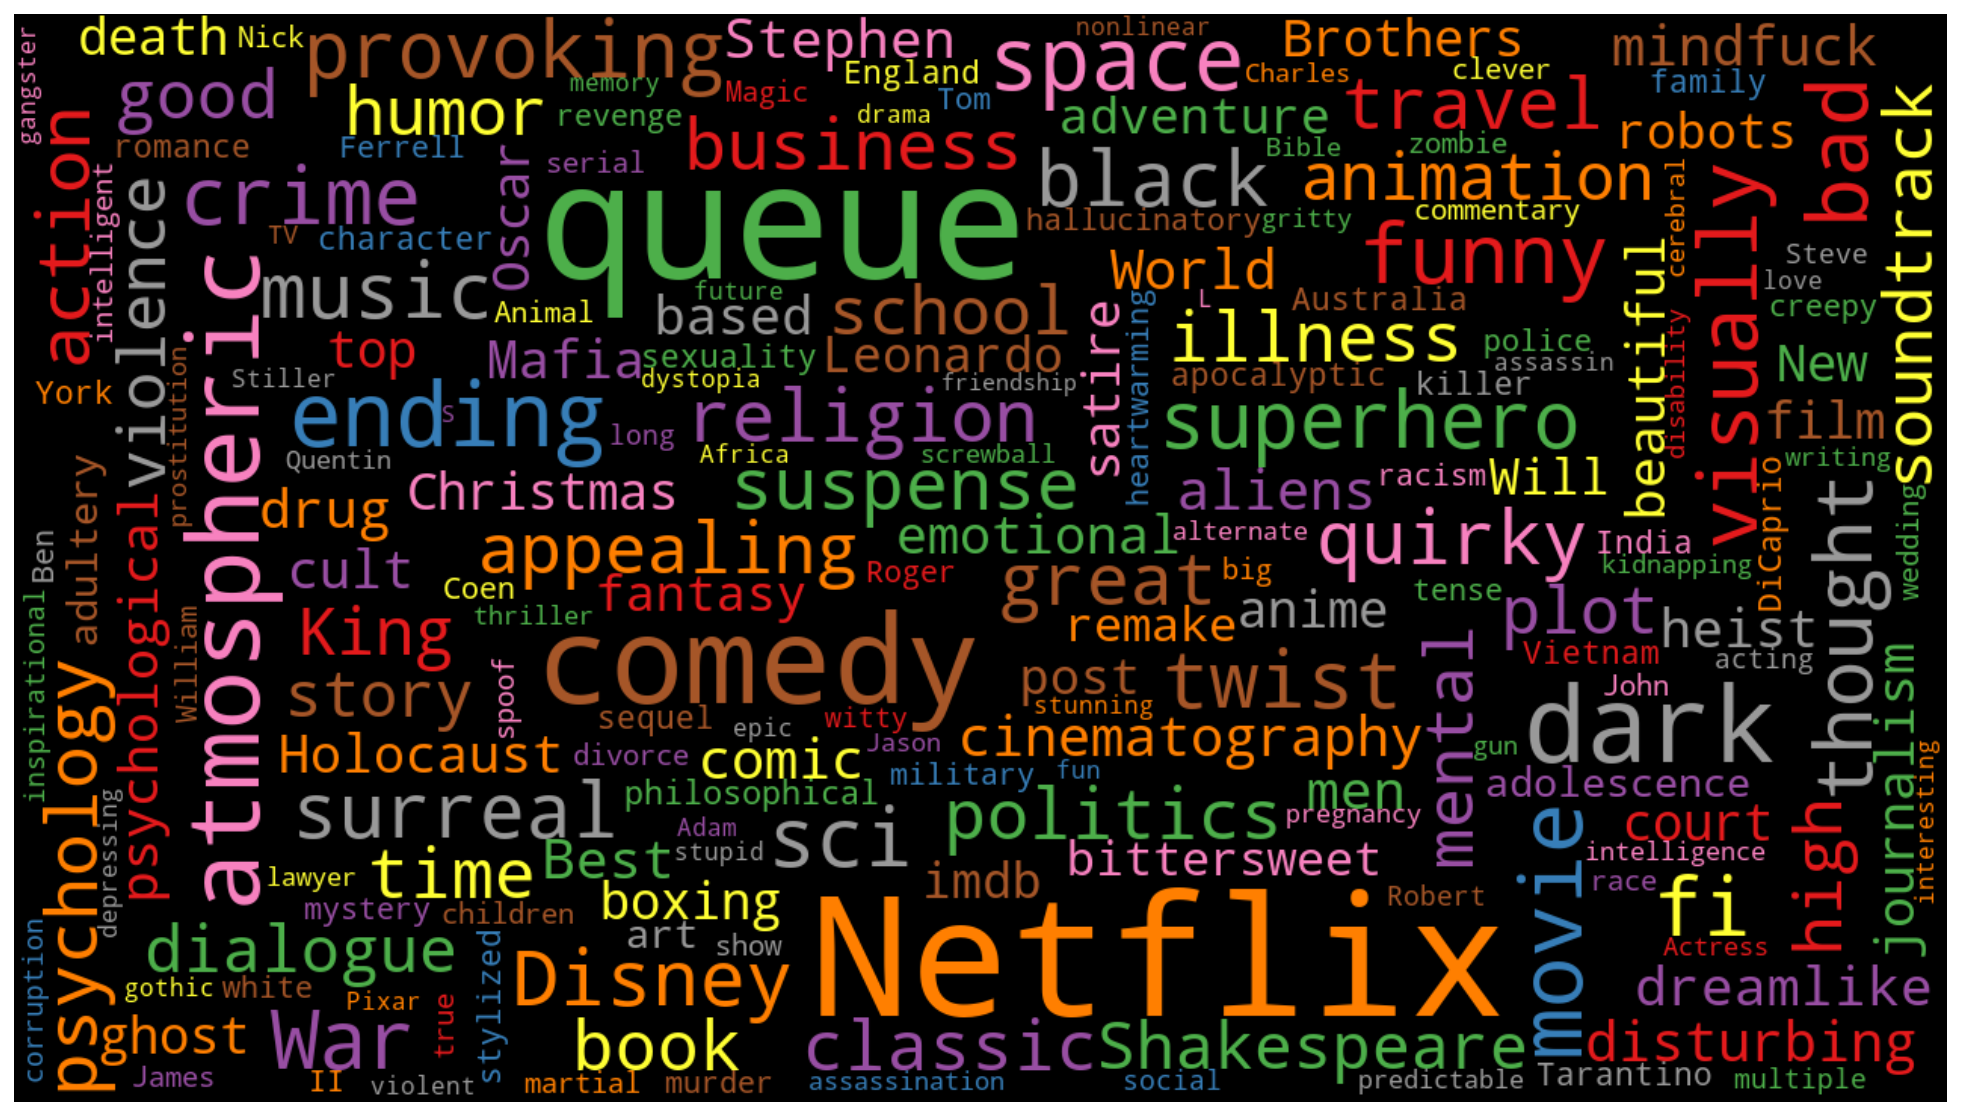

In [9]:
text = tags["tag"]
text = text.to_string()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width= 1280, 
                      height= 720,
                      max_font_size = 110,
                      collocations = False,
                      stopwords=stopwords,
                      colormap="Set1").generate(text)
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Most Popular Movies Per Genre
The genre distribution of our movie dataset helps us zoom out on our data. Some genres such as Drama seem to disproportionately larger than most other genres.

In [10]:
## Make a copy of our movie dataframe
movies_copy = movies.copy()
## Seperate 
g = movies_copy['genres'].str.split('|').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)
# Assign name to column
g.name = 'genres'
# Delete old genres column
del movies_copy['genres']
# join new column with the existing dataframe
movies_copy = movies_copy.join(g)

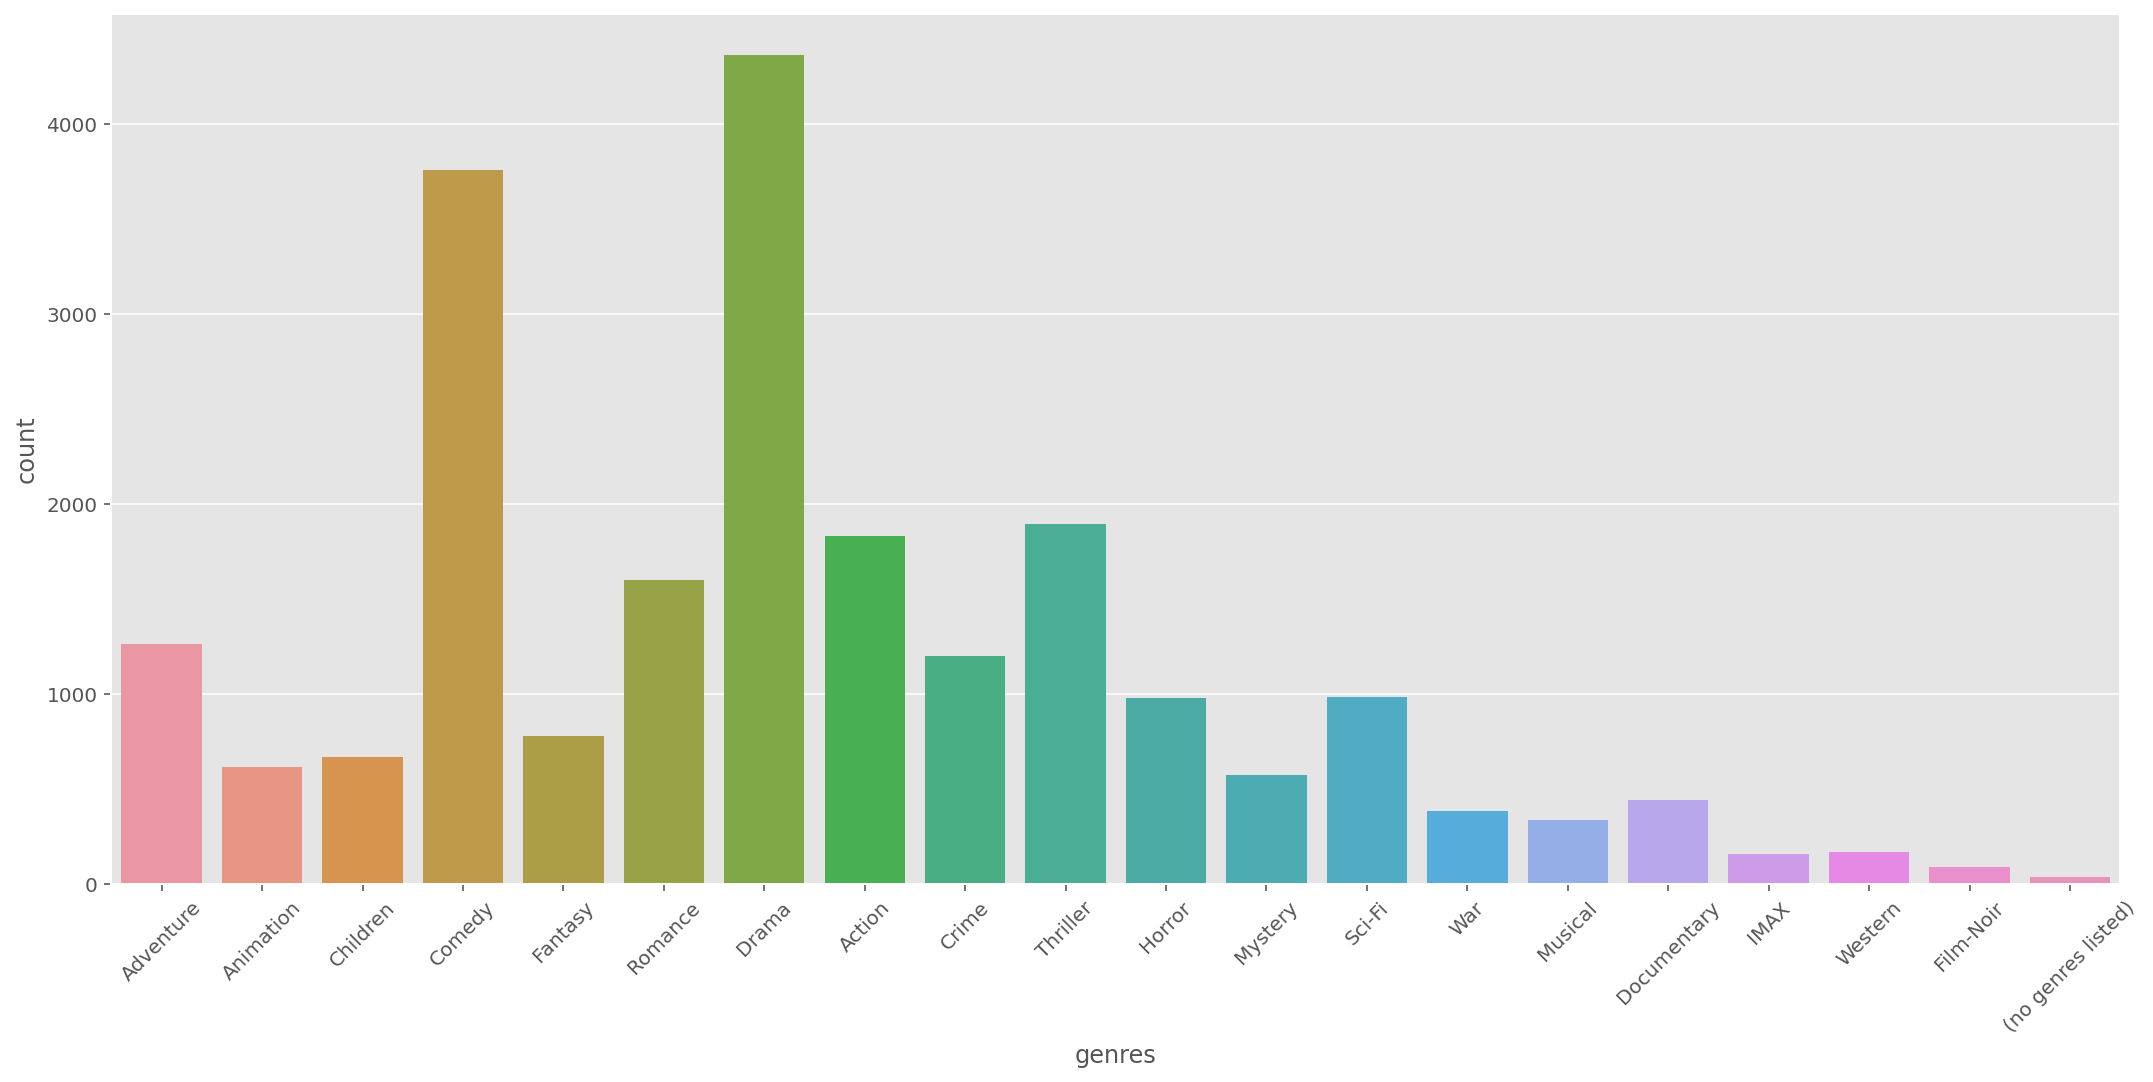

In [11]:
plt.figure(figsize=(18,8))
sns.countplot(x='genres', data=movies_copy)
plt.xticks(rotation=45)
## Delete unneeded copy to save memory
del movies_copy
gc.collect()

plt.show()

### User rating distribution
The rating distribution info allows us to visualize the overall ratings in our dataset for all movies.

<AxesSubplot:>

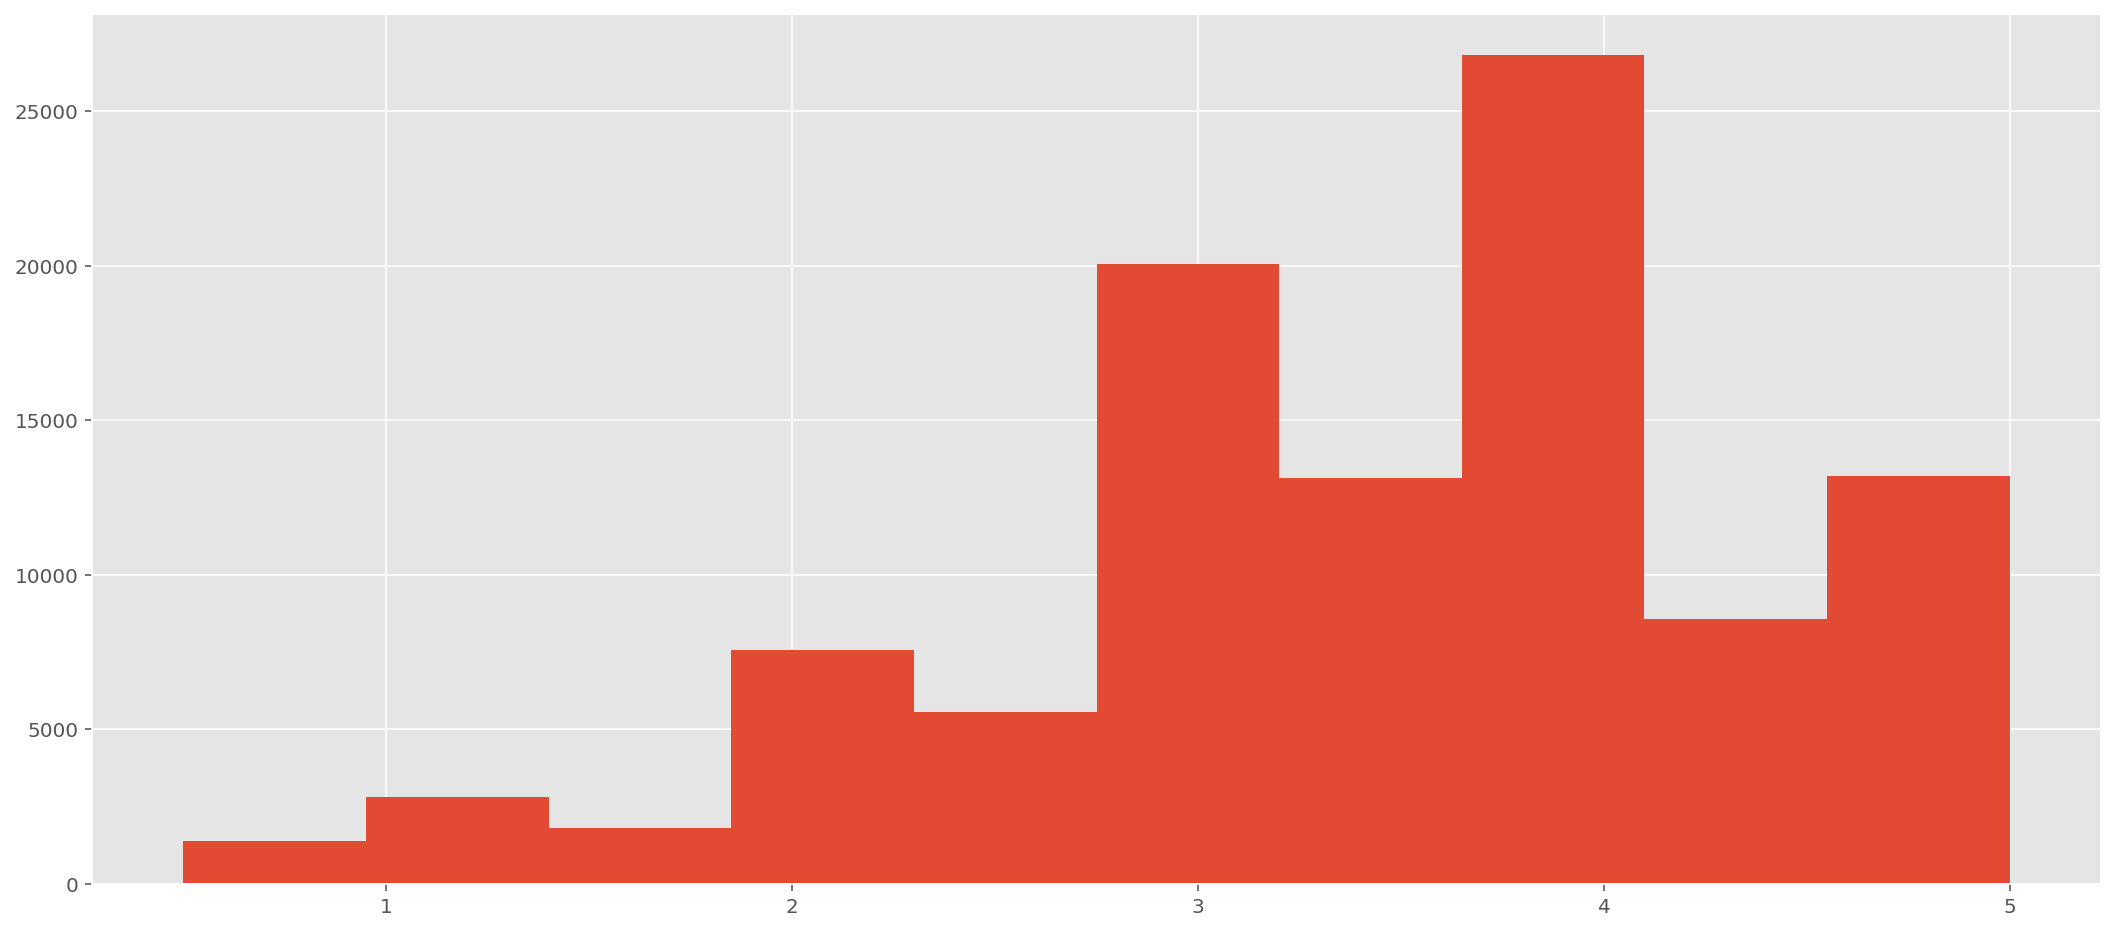

In [12]:
plt.figure(figsize=(18,8))
ratings["rating"].hist()

# Phase 3

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Content-based Filtering

Content-based recommendation systems are systems that look for similarity between items and their discrete attributes in order to recommend additional items with similar attributes. They return a customized list of predictions based on the selected item. We will achieve this by selecting the most important/relevant features of our dataset, vectorizing said data and the choosing the closest items by calculating the distance's and picking the closest items to our original selected item. 

The movies plotted into the data matrix only relate to each other based on provided labels, thus the problem of data sparsity completely disappears as well as any cold start problems. It however suffers from the some scalability issues due to need of creating of a large data matrix.
Being driven only by content-features, such as genres, allows for the algorithm to recommend any movies with similar features. That however does not factor in enough variables to make an accurate prediction because it only gets as good as the labeling is. 

*DOT Framework = Library, Method = Literature*

*Source:*
*GeeksforGeeks. (2020, July 17). Item-to-Item Based Collaborative Filtering.* https://www.geeksforgeeks.org/item-to-item-based-collaborative-filtering/

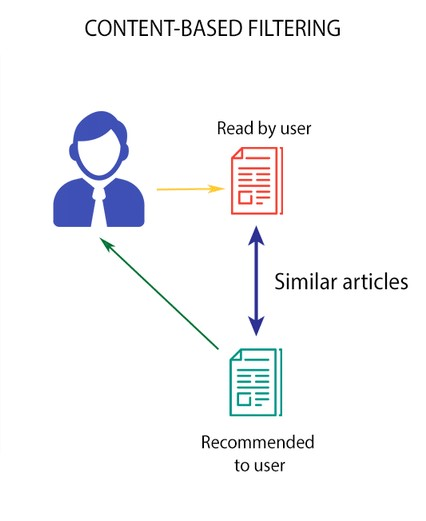

### Preprocessing
#### Feature Selection
For content-based filtering we can only use attributes assigned to the given item in our database. These attributes vary from dataset to dataset. From my dataset I have chose to use:
* Tags
* Genre
* Title
* Year

In [13]:
from IPython.display import display_html 
styler_movies = movies.head(5).style.set_table_attributes("style='display:inline'")
styler_tags = tags.head(5).style.set_table_attributes("style='display:inline'")
display_html(styler_movies._repr_html_()+styler_tags._repr_html_(), raw=True)

movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 2 
 3 
 Grumpier Old Men (1995) 
 Comedy|Romance 
 
 
 3 
 4 
 Waiting to Exhale (1995) 
 Comedy|Drama|Romance 
 
 
 4 
 5 
 Father of the Bride Part II (1995) 
 Comedy 
 
 
 

 
 
 
   
 userId 
 movieId 
 tag 
 
 
 
 
 0 
 2 
 60756 
 funny 
 
 
 1 
 2 
 60756 
 Highly quotable 
 
 
 2 
 2 
 60756 
 will ferrell 
 
 
 3 
 2 
 89774 
 Boxing story 
 
 
 4 
 2 
 89774 
 MMA

The first step we are going to take is removing the UserId's. We do this for the purpose of compressing our tags dataframe. This can be achieved by grouping all available tags into a single row cell with the movieId acting as an unique identifier. The structure is similar to a Series.

In [14]:
## Drop unneeded userId column
tags = tags.drop(columns={"userId"})
print(tags.shape[0])
tags.head(5)

3683


movieId              tag
0    60756            funny
1    60756  Highly quotable
2    60756     will ferrell
3    89774     Boxing story
4    89774              MMA

Just by removing all the duplicate tags we have reduced the size of the dataframe from 3,683 rows down to 3,574 rows. This a reduction of 3% that will allow us to allocate less memory while running this notebook.

In [15]:
## Remove all whitespaces from each column cell
tags["tag"] = tags["tag"].apply(lambda x: x.strip())
## Make all tags lower case because .drop_duplicates is case-sensitive
tags["tag"] = tags["tag"].str.lower()
## Remove all rows that appear twice in our dataframe
tags = tags.drop_duplicates()

gc.collect()
print(tags.shape[0])
tags.head(5)

3574


movieId              tag
0    60756            funny
1    60756  highly quotable
2    60756     will ferrell
3    89774     boxing story
4    89774              mma

The size of our data keeps decreasing with it going from 3,574 rows all the way to 1,572 rows. This makes the current dataframe only 43.9% of the size of the previous one and 42.6% of the original one. With our tags formatted we can move on to the movies themselves.

In [16]:
## Remove unneeded symbols
tags["tag"] = tags["tag"].str.replace('(','')
tags["tag"] = tags["tag"].str.replace(')','')
tags["tag"] = tags["tag"].str.replace(',','')
tags["tag"] = tags["tag"].str.replace('.','')
## Strip all rows again
tags["tag"] = tags["tag"].apply(lambda x: x.strip())
## Group all tags by movieId
tags['tag'] = tags.groupby(['movieId'])['tag'].transform(lambda x : ' '.join(x))
## Remove all duplicates
tags = tags.drop_duplicates()

gc.collect()
print(tags.shape[0])
tags.head(5)

1572


movieId                                                tag
0     60756          funny highly quotable will ferrell comedy
3     89774                         boxing story mma tom hardy
6    106782  drugs leonardo dicaprio martin scorsese stock ...
9     48516  way too long leonardo dicaprio suspense twist ...
10      431                           al pacino gangster mafia

I have reformatted each genre row into an array format for easier use.

In [17]:
movies["genres"]= movies["genres"].str.replace("|"," ",regex=False) 
movies["genres"]= movies["genres"].str.replace("(no genres listed)","NoGenre",regex=False) 

def findGenre(genre):
    return re.findall("(.+?)(?:\s|$)", genre)

movies["genres"] = movies["genres"].apply(findGenre)
movies.head(5)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]

Now we can merge the movies and tags dataframes together. As we can see there are some NaN values since the movie dataframe is bigger than the tags dataframe now. We will be adressing this issue by replacing all NaN values with an empty string.

In [18]:
df_tm = pd.merge(movies,tags, on="movieId",how="left")
df_tm

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                                 genres  \
0     [Adventure, Animation, Children, Comedy, Fantasy]   
1                        [Adventure, Children, Fantasy]   
2                                     [Comedy, Romance]   
3                              [Comedy, Drama, Romance]   
4                                              [Comedy]   
...                                                 ...   
9737               [Action, Animation, Comedy, Fantasy]   
9738                       [Animation, Comedy, Fantasy]   
9739                                            [Drama]   
9740                                [Action, Animation]   
9741                                           [Comedy]   

                                               tag  
0                                        pixar fun  
1     fantasy magic board game robin williams game  
2                                        moldy old  
3                                              NaN  
4                                 pregnancy remake  
...                                            ...  
9737                                           NaN  
9738                                           NaN  
9739                                           NaN  
9740                                           NaN  
9741                                           NaN  

[9742 rows x 4 columns]

In [19]:
## Fill NaNs with an empty string
df_tm["tag"] = df_tm["tag"].fillna("")
df_tm

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                                 genres  \
0     [Adventure, Animation, Children, Comedy, Fantasy]   
1                        [Adventure, Children, Fantasy]   
2                                     [Comedy, Romance]   
3                              [Comedy, Drama, Romance]   
4                                              [Comedy]   
...                                                 ...   
9737               [Action, Animation, Comedy, Fantasy]   
9738                       [Animation, Comedy, Fantasy]   
9739                                            [Drama]   
9740                                [Action, Animation]   
9741                                           [Comedy]   

                                               tag  
0                                        pixar fun  
1     fantasy magic board game robin williams game  
2                                        moldy old  
3                                                   
4                                 pregnancy remake  
...                                            ...  
9737                                                
9738                                                
9739                                                
9740                                                
9741                                                

[9742 rows x 4 columns]

Having all of our data we can now combine all of our columns into one. We will create a new column called overview that will house the title, genres, tag columns. The year is included in the title and I have decided not to extract it from the column since it acts as an identifier for some movies that have the same name but different year of release.

In [20]:
df_tm["overview"] = df_tm.title.astype(str) + " " + df_tm.genres.astype(str) + " " + df_tm.tag.astype(str)
df_tm.head(5)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  \
0  [Adventure, Animation, Children, Comedy, Fantasy]   
1                     [Adventure, Children, Fantasy]   
2                                  [Comedy, Romance]   
3                           [Comedy, Drama, Romance]   
4                                           [Comedy]   

                                            tag  \
0                                     pixar fun   
1  fantasy magic board game robin williams game   
2                                     moldy old   
3                                                 
4                              pregnancy remake   

                                            overview  
0  Toy Story (1995) ['Adventure', 'Animation', 'C...  
1  Jumanji (1995) ['Adventure', 'Children', 'Fant...  
2  Grumpier Old Men (1995) ['Comedy', 'Romance'] ...  
3  Waiting to Exhale (1995) ['Comedy', 'Drama', '...  
4  Father of the Bride Part II (1995) ['Comedy'] ...

Finally the only step that is left is to format our overview column. We will be removing all unneeded characters, white spaces and making everything lower case to avoid case-sensitivity.

In [21]:
## Dictionary of characters that need to be removed
char_to_replace = {'[': '',
                   ']': '',
                   ',': '',
                   '\'':'',
                   '(': '',
                   ')': '',}

def characterRemover(x):
    x = str(x)
    for key, value in char_to_replace.items():
        # Replace key character with value character in string
        x = x.replace(key, value)
    return x
    
df_tm["overview"] = df_tm["overview"].map(lambda x: characterRemover(x) )
df_tm["overview"] = df_tm["overview"].map(lambda x: x.lower())
df_tm["overview"] = df_tm["overview"].map(lambda x: x.strip())
# df_tm = df_tm.dropna()
df_tm.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  \
0  [Adventure, Animation, Children, Comedy, Fantasy]   
1                     [Adventure, Children, Fantasy]   
2                                  [Comedy, Romance]   
3                           [Comedy, Drama, Romance]   
4                                           [Comedy]   

                                            tag  \
0                                     pixar fun   
1  fantasy magic board game robin williams game   
2                                     moldy old   
3                                                 
4                              pregnancy remake   

                                            overview  
0  toy story 1995 adventure animation children co...  
1  jumanji 1995 adventure children fantasy fantas...  
2     grumpier old men 1995 comedy romance moldy old  
3        waiting to exhale 1995 comedy drama romance  
4  father of the bride part ii 1995 comedy pregna...

### Text Vectorization 
TF-IDF is an important measure and is used by algorithms like cosine similarity and linear kernel. It converts a collection of raw documents to a matrix of TF-IDF features. TfidfVectorizer combines all the options of CountVectorizer and TfidfTransformer in a single model. TfidfVectorizer uses an in-memory vocabulary to map the most frequent words to features indices and compute a word occurrence frequency matrix.

In [22]:
## Pass all the rows to a local variable
overview = df_tm["overview"]
## Initialize TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',min_df=0)
gc.collect()
## Generate a tf-idf vector matrix
tfidf_matrix = tfidf.fit_transform(overview)

### Modeling: Training our Machine learning algorithm
Now that we have a TF-IDF matrix we can calculate the cosine similarity between items using linear_kernel. Cosine similarity measures the similarity between two vectors of an inner product space. Cosine similarity is a metric, helpful in determining, how similar the data objects are irrespective of their size.
<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png">

In [23]:
## Compute similarities between movies
cos_similar = linear_kernel(tfidf_matrix , tfidf_matrix)
print(cos_similar.shape)

(9742, 9742)


In [24]:
## Series of movies(indices)
indices = pd.Series(movies.index , index = movies['title']).drop_duplicates()

In [25]:
indices

title
Toy Story (1995)                                0
Jumanji (1995)                                  1
Grumpier Old Men (1995)                         2
Waiting to Exhale (1995)                        3
Father of the Bride Part II (1995)              4
                                             ... 
Black Butler: Book of the Atlantic (2017)    9737
No Game No Life: Zero (2017)                 9738
Flint (2017)                                 9739
Bungo Stray Dogs: Dead Apple (2018)          9740
Andrew Dice Clay: Dice Rules (1991)          9741
Length: 9742, dtype: int64

In [26]:
def get_movies(title):
    ## Check if movie matches exist within our dataset (List)
    validation = indices.loc[indices.index.str.contains(title, case=False)]
    
    if(validation.size > 0):
        ## Take the first title out of our list with movies
        title = (indices.loc[indices.index.str.contains(title, case=False)].index[0])
        
        ## Find movie ID
        idx = indices[title]
        
        ## Get similarity score for provided id
        similar = list(enumerate(cos_similar[idx]))
        
        ## Sort all movies based on similarity scores
        similar = sorted(similar , key = lambda x: x[1] , reverse = True)
        
        # Take the Top 10 closest items
        similar = similar[:11]
        
        ## Set a dictionary state
        state = {"title":[],
                 "distance":[]
        }
        
        ## Add distances and titles to dictionary and return it as a DataFrame
        for i in similar:
            state["title"].append(movies['title'].iloc[i[0]])
            state["distance"].append(i[1])
        return pd.DataFrame.from_dict(state)
    else:
        return "Cannot find movie refering to " + title

### Results
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<img src="https://movieposters2.com/images/655578-b.jpg" style="float:left">

In [27]:
get_movies("Iron man")

title  distance
0                         Iron Man (2008)  1.000000
1                       Iron Man 2 (2010)  0.753501
2                       Iron Man 3 (2013)  0.711122
3                         Iron Man (1931)  0.559386
4                         Iron Sky (2012)  0.536674
5                     Iron Soldier (2010)  0.535225
6     Man with the Iron Fists, The (2012)  0.490562
7                     Babylon A.D. (2008)  0.450708
8                        Iron Will (1994)  0.447281
9   Iron Man & Hulk: Heroes United (2013)  0.432873
10                         Ant-Man (2015)  0.432565

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<img src="https://movieposters2.com/images/653694-b.jpg" style="float:left">

In [28]:
get_movies("The Dark Knight")

title  distance
0   Batman: The Dark Knight Returns, Part 1 (2012)  1.000000
1   Batman: The Dark Knight Returns, Part 2 (2013)  0.892327
2                     Batman: Gotham Knight (2008)  0.468272
3                            Batman Returns (1992)  0.463260
4                          Dark Knight, The (2008)  0.384357
5                          Superman Returns (2006)  0.351929
6                Batman/Superman Movie, The (1998)  0.350445
7                              First Knight (1995)  0.321226
8                                      2012 (2009)  0.317582
9                Invisible Man Returns, The (1940)  0.313517
10                           Knight and Day (2010)  0.310903

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<img src="https://movieposters2.com/images/1073669-b.jpg" style="float:left">

In [29]:
get_movies("SpidEr-man")

title  distance
0                   Spider-Man (2002)  1.000000
1                 Spider-Man 3 (2007)  0.692096
2      Amazing Spider-Man, The (2012)  0.568168
3     The Amazing Spider-Man 2 (2014)  0.537816
4              Superhero Movie (2008)  0.482112
5                 Spider-Man 2 (2004)  0.475988
6                     Superman (1978)  0.457391
7                 Superman III (1983)  0.418080
8   Untitled Spider-Man Reboot (2017)  0.398999
9                 Man of Steel (2013)  0.398223
10                      Spider (2002)  0.395524

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Collaborative-Filtering


Collaborative filtering creates predictions using a user's past behavior as well as the decisions made by other users. Such a prediction could be achieved using the K-Nearest Neighbors algorithm (KNN). KNN doesn't make any assumptions on the underlying data distribution but it relies on item feature similarity. KNN will calculate the “distance” between the target movie and every other movie in its dataset, then it ranks its distances and returns the top K nearest neighbor movies as the most similar movie recommendations.

The Collaborative Filtering Recommender is entirely based on a user’s the past behavior. It is based on the similarity in preferences between users. It analyses that similarity and then makes recommendations on the based on that relation.

KNN finds similarity between two datapoints by calculating the distance between them in a matrix. There are several ways of said distance calculating distance, the most popular of which is the straight line method called Euclidean distance.

The algorithms main disadvantage is that it becomes significantly slower as the volume of data increases. This makes it an impractical choice for large scale application. It suffers from a cold start problem, by not being able to accommodate new users or movie.

Another big issue is that because of the nature of the algorithm it tends to recommend more frequently and higher rated movies. It does not consider any labels so even though a sequel of a movie might be the best recommendation, the algorithm might return a random very popular movie.

*DOT Framework = Library, Method = Literature*

*Source:*
*Rocca, B. (2021, December 10). Introduction to recommender systems - Towards Data Science. Medium.* *https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada*

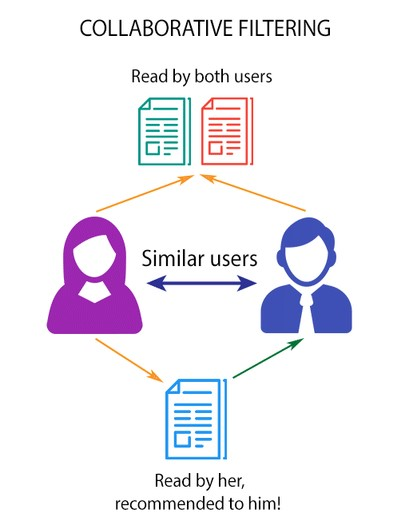

### Preprocessing
To further explore different methods of recommendation we will first reset all of our modified dataframes.

In [30]:
# Reset all dataframes
del movies, ratings, tags
gc.collect()

dir = r"C:\Users\CybiW\Jupyter\project_datasets\ml-latest-small\\"
movies = pd.read_csv(dir + "movies.csv")
ratings = pd.read_csv(dir + "ratings.csv")
tags = pd.read_csv(dir + "tags.csv")

### User-Movie Matrix

First we need to convert our data into a 2-dimensional array. We do that by creating a pivot table using .pivot(), where the X axis will be our users' IDs and the Y axis will be our movies' IDs. The values that will populate the axis' intersections will be the ratings of the users.

In [31]:
## Create pivot table (matrix)
ratings_matrix = ratings.pivot(index='movieId',
                               columns='userId',
                               values='rating')
ratings_matrix

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  4.0  NaN  4.5  NaN  NaN  NaN  ...  4.0  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  
...      ...  ...  ...  ...  ...  ...  ...  
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[9724 rows x 610 columns]

After observing the matrix we can observe that most of the values in it are NaN (Null). For the algorithm to calculate distances between vectors we need to populate all cells. For that reason we will be filling all empty cells with the value of 0.

In [32]:
## Fill empty cells with the value 0
ratings_matrix.fillna(0,inplace=True)
ratings_matrix.head()

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  0.0  0.0  2.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  2.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 610 columns]

We do not want to feed the entire data, that is mostly 0's, to the KNN algorithm. For more efficient calculation and lower memory usage, we need to transform the values of the dataframe into a scipy sparse matrix.

In [33]:
from scipy.sparse import csr_matrix
## Compress the matrix using csr
csr_data = csr_matrix(ratings_matrix.values)
ratings_matrix.reset_index(inplace=True)
csr_data

<9724x610 sparse matrix of type '<class 'numpy.float64'>'
	with 100836 stored elements in Compressed Sparse Row format>

###  Modeling: Training KNearestNeighbors model

After we preprocessed the data and transformed the dataframe of ratings into a sparse matrix, we need to configure our KNN model with the correct hyper-parameters.

In [34]:
from sklearn.neighbors import NearestNeighbors
## Fit data into KNN
KNN = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
KNN.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

When we give our algorithm an existing movieId, from our csr_data, it will calculate the closest highest rated movies. But because we are not machines and cannot remember numerical data as good as we can remember simple names. We have to make a method that takes a name, check if it is contained in our dataset and then do everything else.

In [35]:
def get_movies(movie_name):
    ## Number of recommendations we will recieve at the end of our prediction
    recommendations = 10
    recommendations += 1
    ## Ensure that our input is of type string and capitalize it for case-sensitive matching
    movie_name = str(movie_name)
    movie_list = movies[movies['title'].str.contains(movie_name, case=False)]
    ## Check if we found any movies with the received matching name
    count = len(movie_list)
    if count > 0:
        ## Get movieId from movielist
        movie_idx = movie_list.iloc[0]['movieId']
        ## Get the movieId from the data matrix
        movie_idx = ratings_matrix[ratings_matrix['movieId']
                                   == movie_idx].index[0]

        ## Get indices and distance for the 5 closest moviesId's
        distances, indices = KNN.kneighbors(
            csr_data[movie_idx], n_neighbors=recommendations)
        ## Sort the two arrays and merge them into a series of tuples
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())),
                                   key=lambda x: x[1])[:0:-1]

        rec_movies = []
        for val in rec_movie_indices:
            ## Find movieID inside of our matrix
            movie_idx = ratings_matrix.iloc[val[0]]['movieId']
            ## Find the index of the movie row in the movies dataset
            idx = movies[movies['movieId'] == movie_idx].index
            ## Add the title and distance of each movie compared to the input
            rec_movies.append(
                {'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1]})

        ## Convert our findings to a dataframe and return it
        df = pd.DataFrame(rec_movies, index=range(1, recommendations))
        return df
    else:
        return "Unable to find recommendations for " + movie_name

### Results
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<img src="https://movieposters2.com/images/655578-b.jpg" style="float:left">

In [36]:
with option_context('display.max_colwidth', 900):
    display(get_movies('Iron man'))

Title  Distance
1                 Star Trek (2009)  0.417513
2   Guardians of the Galaxy (2014)  0.411029
3                      Thor (2011)  0.410508
4                        Up (2009)  0.403264
5             Batman Begins (2005)  0.402929
6                    Avatar (2009)  0.375732
7                Iron Man 2 (2010)  0.358014
8             Avengers, The (2012)  0.341324
9                    WALL·E (2008)  0.332225
10         Dark Knight, The (2008)  0.329462

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<img src="https://movieposters2.com/images/653694-b.jpg" style="float:left">

In [37]:
with option_context('display.max_colwidth', 900):
    display(get_movies('The Dark Knight'))

Title  Distance
1                         Ultimate Avengers (2006)  0.419468
2                                      JCVD (2008)  0.418204
3      Justice League: Crisis on Two Earths (2010)  0.418204
4                Doctor Who: Last Christmas (2014)  0.417563
5                         All-Star Superman (2011)  0.417413
6   Batman: The Dark Knight Returns, Part 2 (2013)  0.405437
7    Doctor Who: The Husbands of River Song (2015)  0.397541
8                               Harry Brown (2009)  0.392529
9                                   Lawless (2012)  0.391738
10            Doctor Who: A Christmas Carol (2010)  0.389822

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<img src="https://movieposters2.com/images/1073669-b.jpg" style="float:left">

In [38]:
res23 = get_movies('Spider-man')
with option_context('display.max_colwidth', 900):
    display(get_movies('Spider-man'))

Title  Distance
1                                     Bourne Identity, The (2002)  0.389831
2                   Lord of the Rings: The Two Towers, The (2002)  0.388087
3                                     Matrix Reloaded, The (2003)  0.387891
4       Lord of the Rings: The Fellowship of the Ring, The (2001)  0.379254
5   Pirates of the Caribbean: The Curse of the Black Pearl (2003)  0.375362
6                                                    X-Men (2000)  0.370047
7                                         X2: X-Men United (2003)  0.361211
8                                          Minority Report (2002)  0.338738
9             Star Wars: Episode II - Attack of the Clones (2002)  0.303643
10                                            Spider-Man 2 (2004)  0.267842

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Hybrid System

There are different types of Hybrid Systems that can be implemented. For this project we are going to create a Feature Augmentation Hybrid System. This type of recommendation system is able to improve the results and performance of the core system without changing the main recommendation algorithm. It achieves this by generating a rating or classification for an item, which is further used in the main recommendation algorithm to produce an improved final result.

In this project we will be using K-Means clustering to separate our movies into different clusters, from which we will we will take the additional information and add it to our main recommendation system, which will be the Content-based filtering solution in the notebook.

*DOT Framework = Library, Method = Literature*

*Source:*
*Chiang, J. (2022, January 6). 7 Types of Hybrid Recommendation System - Analytics Vidhya. Medium.* https://medium.com/analytics-vidhya/7-types-of-hybrid-recommendation-system-3e4f78266ad8

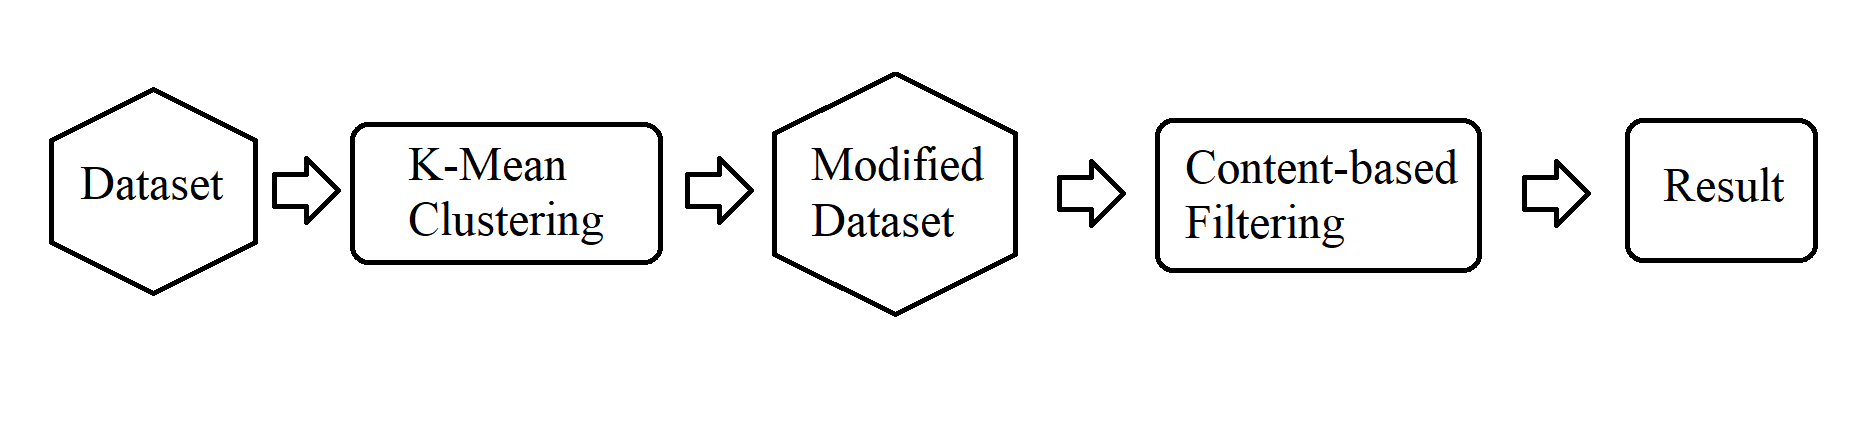

### Importing New Dataset

We will be resetting our dataframes again in order to remove all modifications we have done to them.

In [39]:
dir = r"C:\Users\CybiW\Jupyter\project_datasets\ml-latest\\"
movies = pd.read_csv(dir + "movies.csv")
ratings = pd.read_csv(dir + "ratings.csv")
tags = pd.read_csv(dir + "tags.csv")
gc.collect()

117

In [40]:
movies

movieId                                    title  \
0            1                         Toy Story (1995)   
1            2                           Jumanji (1995)   
2            3                  Grumpier Old Men (1995)   
3            4                 Waiting to Exhale (1995)   
4            5       Father of the Bride Part II (1995)   
...        ...                                      ...   
58093   193876                  The Great Glinka (1946)   
58094   193878  Les tribulations d'une caissière (2011)   
58095   193880                 Her Name Was Mumu (2016)   
58096   193882                             Flora (2017)   
58097   193886                              Leal (2018)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
58093                           (no genres listed)  
58094                                       Comedy  
58095                                        Drama  
58096                Adventure|Drama|Horror|Sci-Fi  
58097                           Action|Crime|Drama  

[58098 rows x 3 columns]

In [41]:
ratings

userId  movieId  rating   timestamp
0              1      307     3.5  1256677221
1              1      481     3.5  1256677456
2              1     1091     1.5  1256677471
3              1     1257     4.5  1256677460
4              1     1449     4.5  1256677264
...          ...      ...     ...         ...
27753439  283228     8542     4.5  1379882795
27753440  283228     8712     4.5  1379882751
27753441  283228    34405     4.5  1379882889
27753442  283228    44761     4.5  1354159524
27753443  283228    54286     4.5  1354159718

[27753444 rows x 4 columns]

### Preprocessing

The first step we will take is to remove all unneeded columns from our ratings dataset.

In [42]:
ratings = ratings.drop(columns={"rating", "timestamp"})

After we have done that we will be dropping all duplicate ratings that might exist in our dataframe.

In [43]:
## Compressing the dataframe since i do not have enough memory to process the entire 27 million entries
## Removing movies that have less than 100 ratings
counts_movies = ratings['movieId'].value_counts()
ratings = ratings[~ratings['movieId'].isin(counts_movies[counts_movies < 100].index)]
## Removing users that have less than 1500 reviews
counts_users = ratings['userId'].value_counts()
ratings = ratings[~ratings['userId'].isin(counts_users[counts_users < 1500].index)]

## Removing duplicates
ratings = ratings.drop_duplicates()
ratings

userId  movieId
20318        214        1
20319        214        3
20320        214        6
20321        214       10
20322        214       11
...          ...      ...
27735156  283000   185473
27735158  283000   187541
27735159  283000   187593
27735160  283000   187723
27735163  283000   188301

[1681778 rows x 2 columns]

The next step will be to reset the index of our dataframe and drop any rows with null values (If there are any).

In [44]:
## Resetting index
ratings = ratings.reset_index().drop(columns="index")
## Dropping rows with null cells
ratings = ratings.dropna()
ratings

userId  movieId
0           214        1
1           214        3
2           214        6
3           214       10
4           214       11
...         ...      ...
1681773  283000   185473
1681774  283000   187541
1681775  283000   187593
1681776  283000   187723
1681777  283000   188301

[1681778 rows x 2 columns]

In [45]:
## Create a crosstab matrix using groupby (A lot faster than pd.crosstab)
user_movie = ratings.groupby(['movieId', 'userId'])['userId'].count().unstack().fillna(0)
user_movie

userId   214     235     239     1272    1933    2025    2040    2150    \
movieId                                                                   
1           1.0     1.0     1.0     1.0     0.0     1.0     1.0     1.0   
2           0.0     1.0     1.0     0.0     0.0     1.0     1.0     1.0   
3           1.0     0.0     0.0     0.0     1.0     1.0     1.0     1.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0     0.0     0.0     0.0     1.0     1.0     1.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
189363      0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
189713      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
191351      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
191799      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
192283      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

userId   2294    2329    ...  278527  278817  280148  280585  280868  281438  \
movieId                  ...                                                   
1           0.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
2           0.0     1.0  ...     1.0     1.0     1.0     1.0     0.0     1.0   
3           0.0     0.0  ...     0.0     1.0     0.0     0.0     1.0     1.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     1.0     1.0   
5           0.0     0.0  ...     0.0     1.0     1.0     1.0     0.0     0.0   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
189363      0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
189713      1.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
191351      0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
191799      0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
192283      0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

userId   281631  281790  282172  283000  
movieId                                  
1           1.0     1.0     1.0     1.0  
2           1.0     1.0     1.0     0.0  
3           0.0     0.0     0.0     0.0  
4           0.0     0.0     0.0     0.0  
5           0.0     0.0     1.0     1.0  
...         ...     ...     ...     ...  
189363      0.0     0.0     0.0     0.0  
189713      0.0     0.0     0.0     0.0  
191351      0.0     0.0     0.0     0.0  
191799      0.0     0.0     0.0     0.0  
192283      0.0     0.0     0.0     0.0  

[10500 rows x 794 columns]

While some movies do exists within our dataset they may not have been rated by users. This will result in a purely content-based prediction, which is something we would like to avoid just for the demonstration of this filtering method. For that reason we will be removing all movies that do not exist within our crosstab matrix.

In [46]:
## Find movies that exist only in our movies dataframe
df_diff = pd.concat([movies["movieId"],ratings["movieId"]]).drop_duplicates(keep=False)
## Remove found movies from the `movies` dataframe
movies = movies[~movies.movieId.isin(df_diff)]
movies

movieId                                     title  \
0            1                          Toy Story (1995)   
1            2                            Jumanji (1995)   
2            3                   Grumpier Old Men (1995)   
3            4                  Waiting to Exhale (1995)   
4            5        Father of the Bride Part II (1995)   
...        ...                                       ...   
56364   189363                          Ocean's 8 (2018)   
56516   189713                     BlacKkKlansman (2018)   
57120   191351  To All the Boys I've Loved Before (2018)   
57281   191799                         Extinction (2018)   
57480   192283                  Crazy Rich Asians (2018)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
56364                 Action|Comedy|Crime|Thriller  
56516                           Comedy|Crime|Drama  
57120                               Comedy|Romance  
57281                                       Sci-Fi  
57480                                       Comedy  

[10500 rows x 3 columns]

### Dimensionality Reduction via PCA
Principal Component Analysis (PCA) is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of "summary indices" that can be more easily visualized and analyzed.

PCA takes a dataset with a lot of dimensions/cells and flattens it to 2 or 3 dimensions so we can observe it.
It tries to find a meaningful way to flatten the data by focusing on the things that are different between cells.
In simple terms PCA takes our matrix with all of it's dimensions, uses it to calculate the Eigen value and Eigen vectors for each dimension, we sort those values and pick the three biggest ones, since they have the highest variance. From there we plot our 3 vectors and project our data on to them. This gives us a fair representation of our n-dimensional data in 3D or 2D space. 

This video by Serrano.Academy explains the process in a more detailed and summarized way. https://youtu.be/g-Hb26agBFg

*DOT Framework = Library, Method = Literature*

*Source:*
*Sartorius. (n.d.). What Is Principal Component Analysis (PCA) and How It Is Used?* https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186#:%7E:text=Principal%20component%20analysis%2C%20or%20PCA,more%20easily%20visualized%20and%20analyzed.

In [47]:
pca = PCA(n_components = 3)
pca.fit(user_movie)
pca_samples = pca.transform(user_movie)

In [48]:
## Transform the result to a dataframe
tocluster = pd.DataFrame(pca_samples)

In [49]:
tocluster

0         1         2
0      20.416070  0.226571  0.348162
1      16.764589  1.094276 -3.370438
2       8.730532 -2.522840 -4.465338
3      -0.932003 -2.513165 -1.833669
4       8.000649 -1.359746 -4.852729
...          ...       ...       ...
10495  -3.933781  1.571848  0.405879
10496  -4.886587  0.457897  0.191607
10497  -5.437885  0.236800 -0.360693
10498  -4.806352  0.992168 -0.677187
10499  -4.629880  0.497911  0.263841

[10500 rows x 3 columns]

Now that we have flattened our dataframe to only 3 dimensions we can visualize our data using Axes3D by using the columns 0,1,2 as our X,Y,Z axis. 

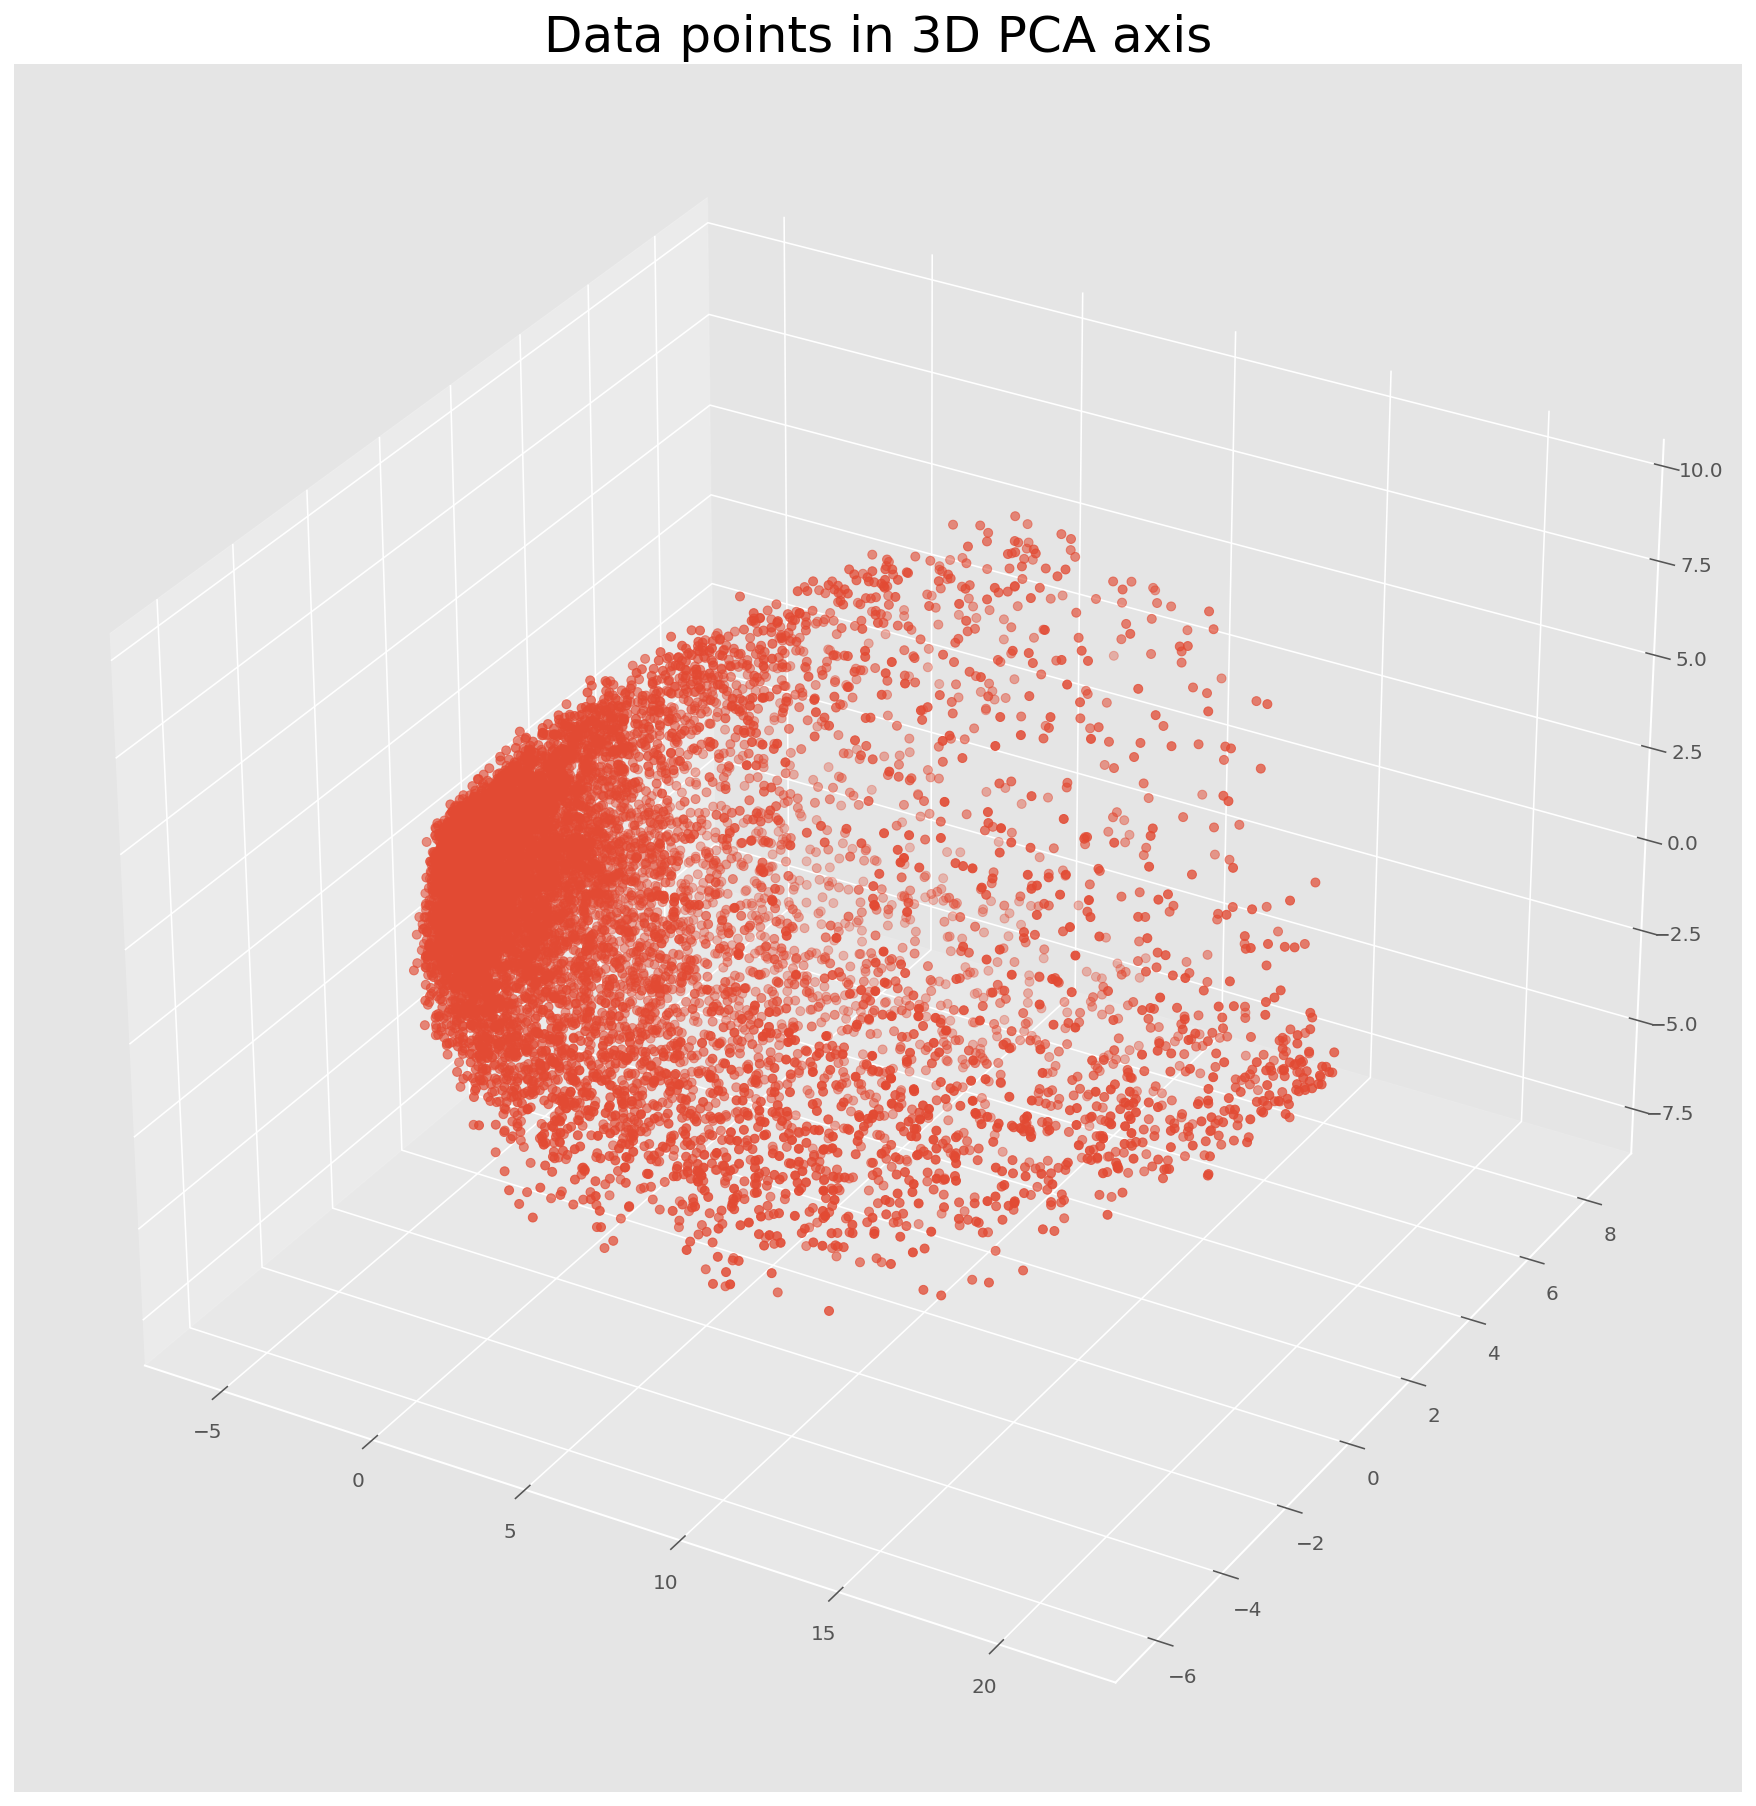

In [50]:
fig = plt.figure(figsize = (20, 12))
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=25)
plt.show()

### K-means Clustering

Now that we have our data prepared we can begin the modeling process. We will be separating our datapoints several clusters and then modifying our *movies* dataframe to include that information. But first we need to find how many clusters we should split our data into.

K-means clustering is an unsupervised machine learning algorithm. The algorithm tries to group similar items in the form of clusters. The number of groups is represented by K value.

*DOT Framework = Library, Method = Literature*

*Source:*
*Pandey, A. K. (2020, October 5). A Simple Explanation of K-Means Clustering and its Adavantages. Analytics Vidhya.* https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/

#### Optimal K value

K-Means Clustering aims to partition the number of observations into **n**-number of clusters, in which each observation belongs to the cluster with the nearest mean. There are a few methods that helps us to find how many clusters we should divide our data into. The two most popular ones are the **Elbow Method** and the **Silhouette Method**.

In [51]:
## Elbow Method calculation
inertia = []
for i in range(1,10):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(tocluster)
    inertia.append(kmeanModel.inertia_)
## Silhouette Method calculation
scores = []
for i in range(2,10):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(tocluster)
    scores.append(silhouette_score(tocluster, kmeanModel.labels_))

##### Elbow Method

To calculate the optimal K value using the elbow method we need to iterate the values of k in a range from 1 to 10, then calculate the inertia for each value of k in the given range. Inertia is the sum of squared distances of samples to their closest cluster center. To determine the optimal number of clusters, we have to select the value of k at the point after which the inertia start decreasing in a linear fashion. In our case the k value should be 4.

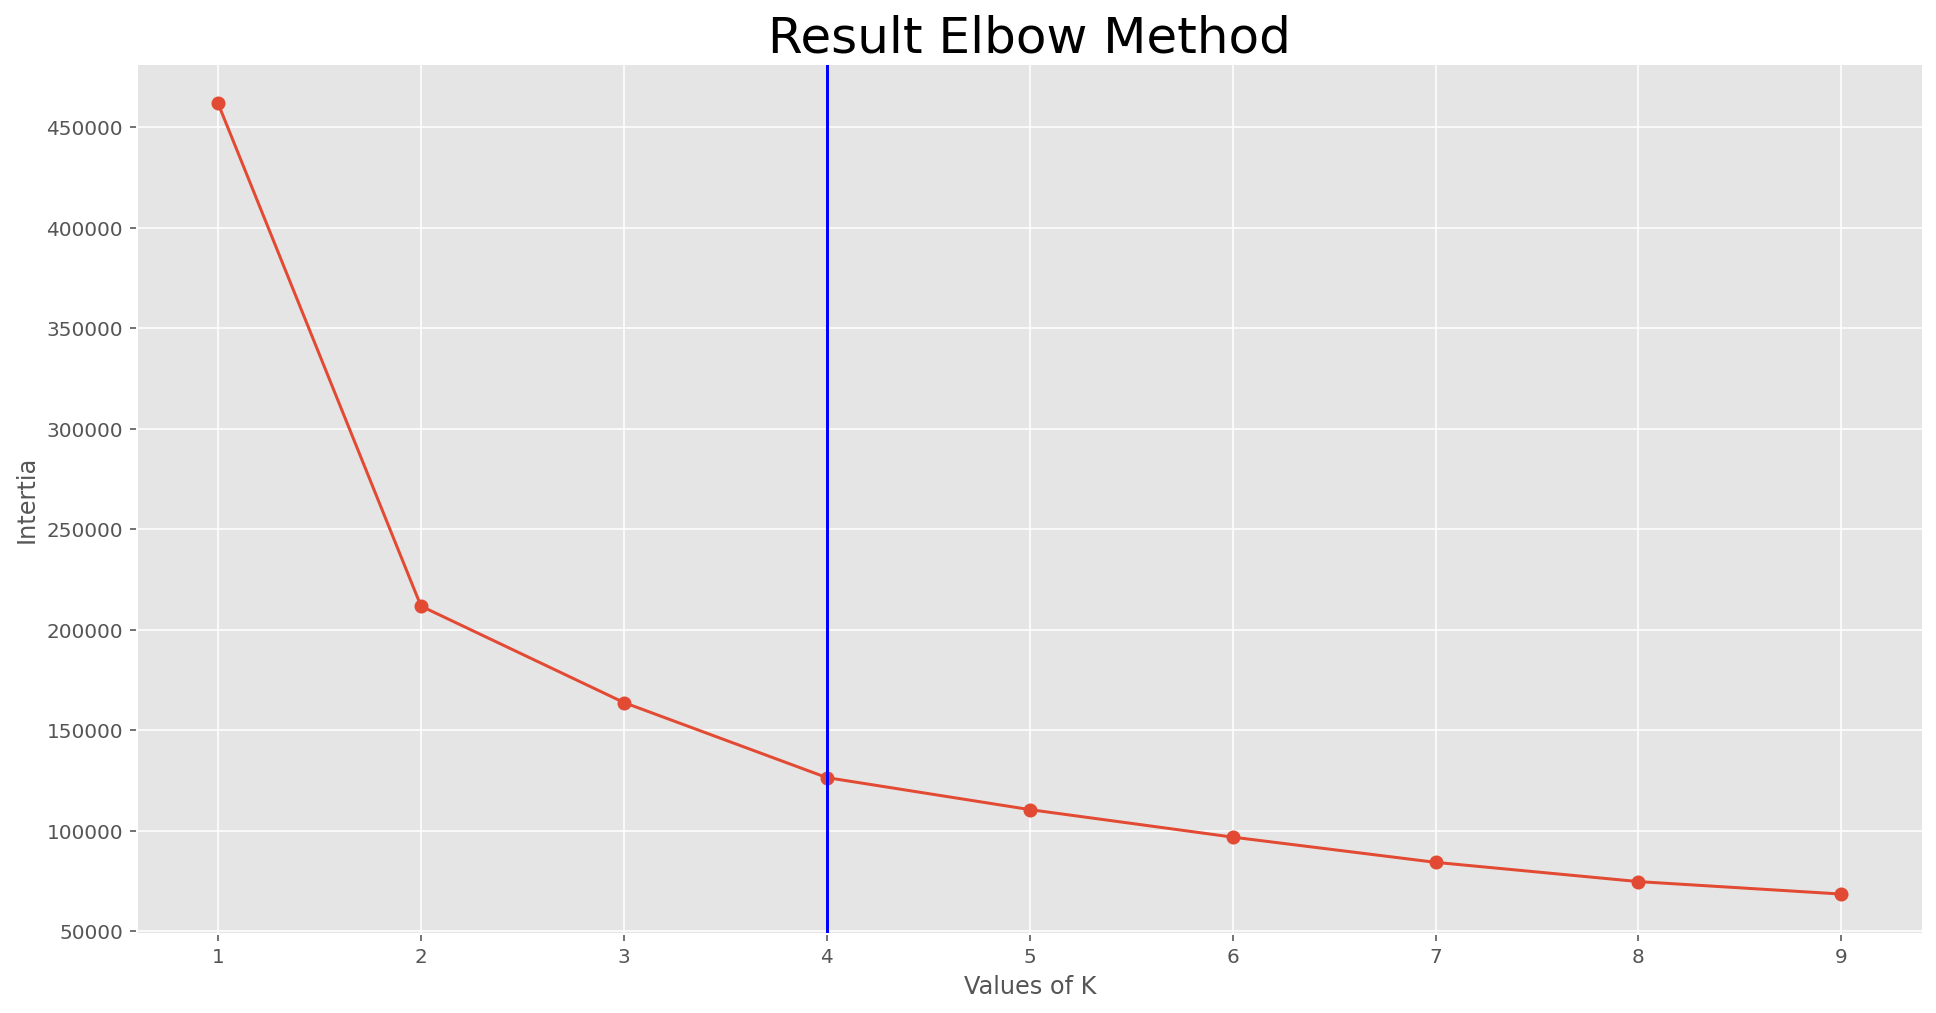

In [52]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), inertia, '-o')
plt.axvline(x=4, linestyle='-', color='blue')
plt.title('Result Elbow Method', fontsize=25)
plt.xlabel('Values of K')
plt.ylabel('Intertia')
plt.show()

##### Silhouette Method

Another method of calculating the optimal k value is the Silhouette method. It is a method that computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters. To determine the optimal number of clusters, we have to select the first value of k where both the previous and next k value have a lower silhouette score than the selected value. In our case the k value should be 4.

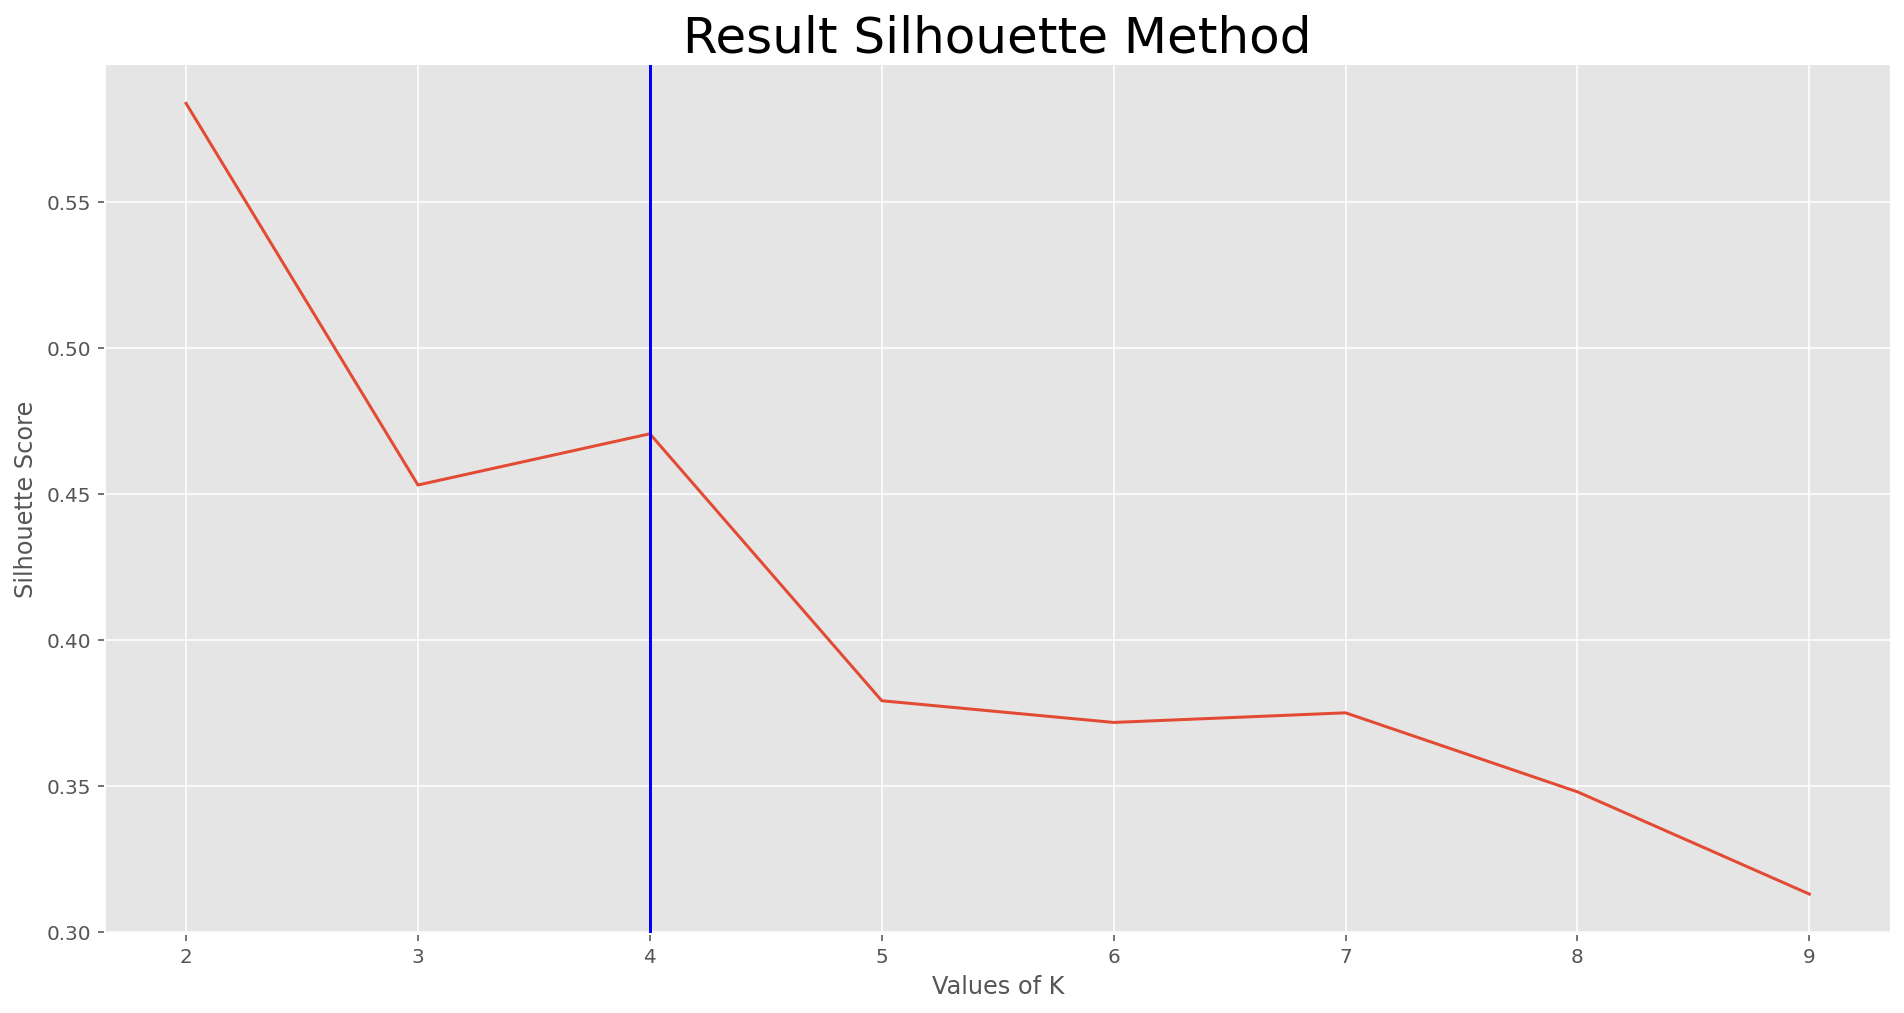

In [53]:
plt.figure(figsize=(16,8))
plt.plot(range(2,10), scores)
plt.axvline(x=4, linestyle='-', color='b')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Result Silhouette Method', fontsize=25)
plt.show()

### Modeling: Training K-Means model

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. It clusters data by trying to separate samples in k-number of groups of equal variance. 
Now that we have the optimal *k* value we will set the *n_clusters* hyper parameter to it. After which we will be fitting our flattened data into the K-Means algorithm. 
To avoid inconsistency in our result we will be setting the *random_state* parameter to 42.

In [54]:
kmeanModel = KMeans(n_clusters=4, random_state=42,n_init=20, init='k-means++')
kmeanModel.fit(tocluster)
centers = kmeanModel.cluster_centers_
c_preds = kmeanModel.predict(tocluster)

### Visualization of clusters
#### Visualization in 3D space

Here we can again use Axes3D to visualize all datapoints and how the they have been seperated by the clustering algorithm. Each color represents a different cluster.

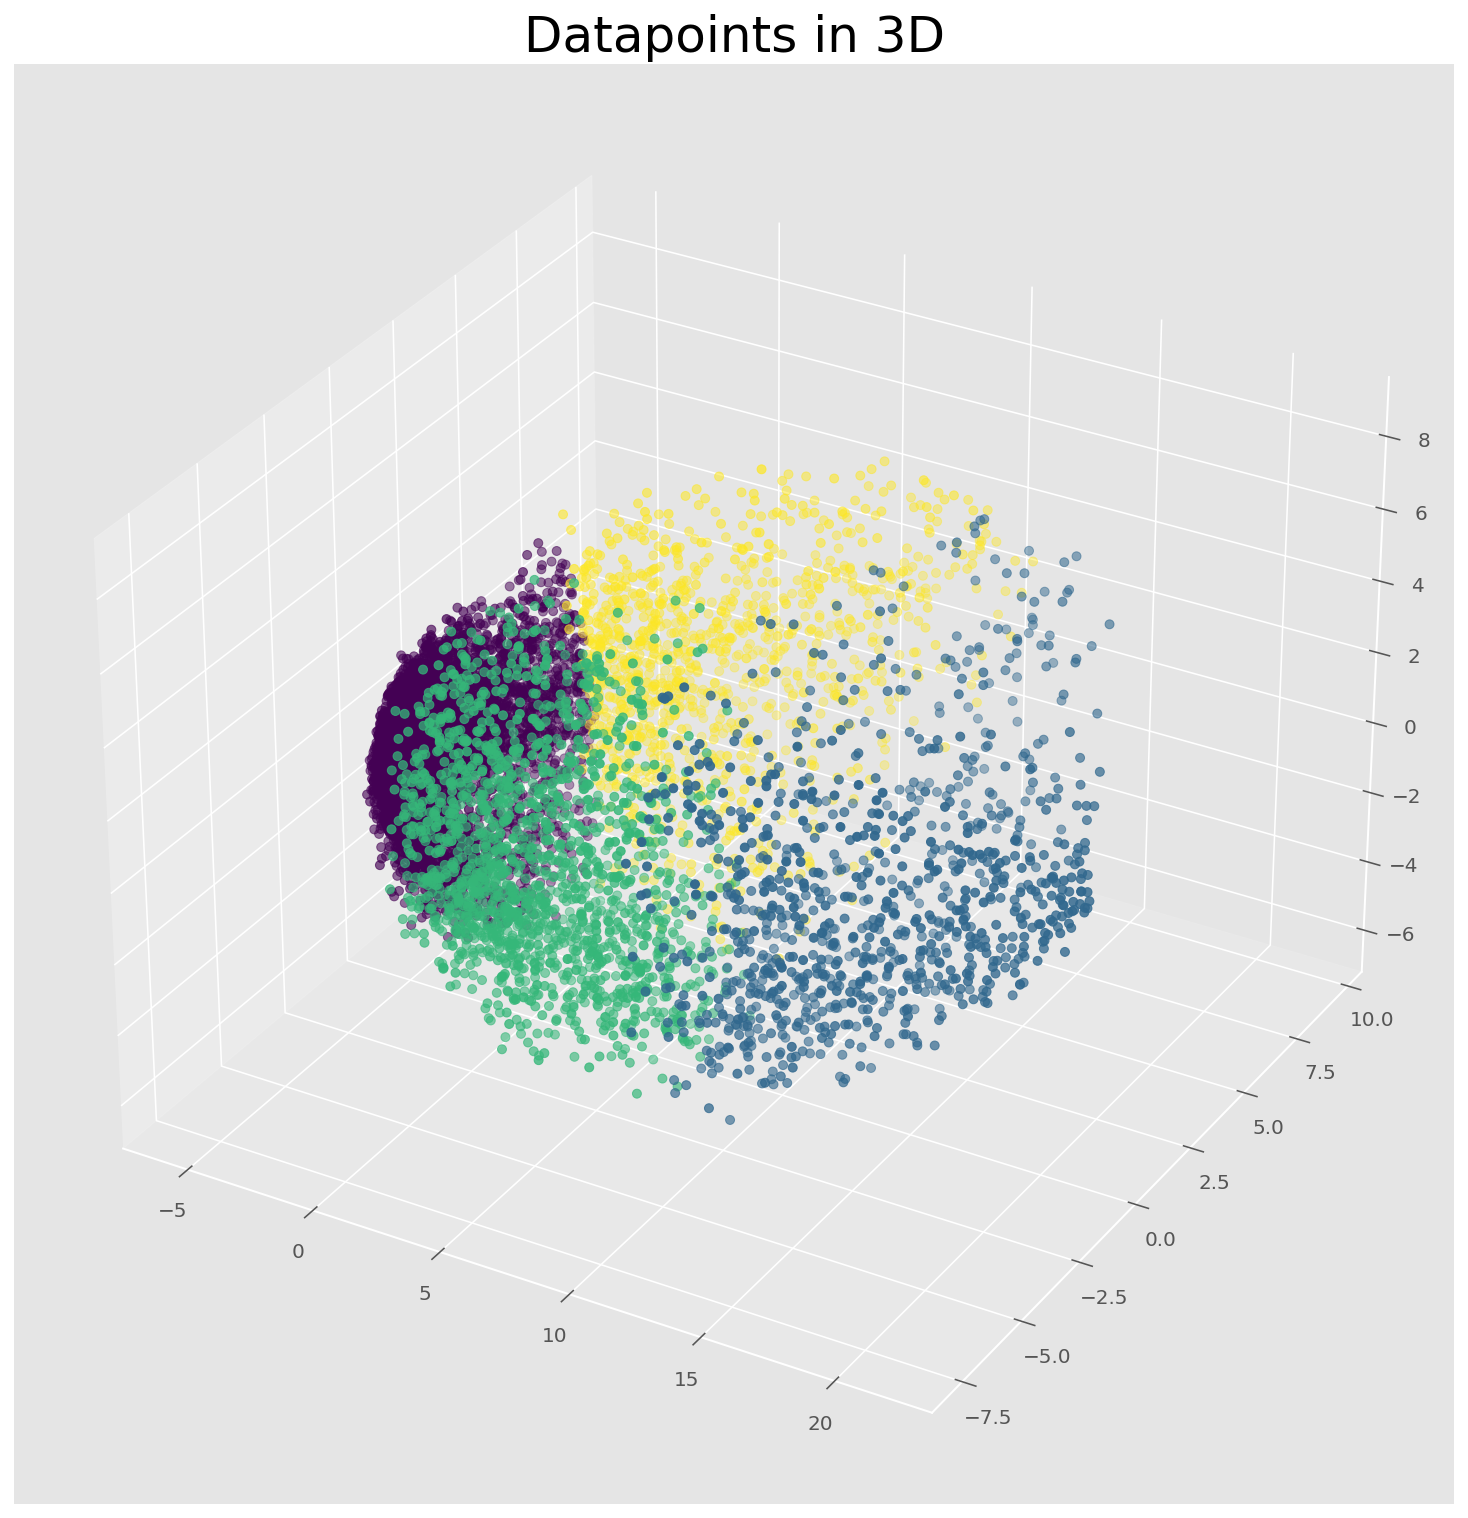

In [55]:
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[1], tocluster[2], c=c_preds)
plt.title("Datapoints in 3D", fontsize = 25)
plt.show()

#### Visualization in 2D space

We can also create a normal 2-dimensional plot that would allows us to view a simpler representation of our data. Here each cluster is represented by a different color, but we also have each cluster's center presented on the plot as a big red circle.

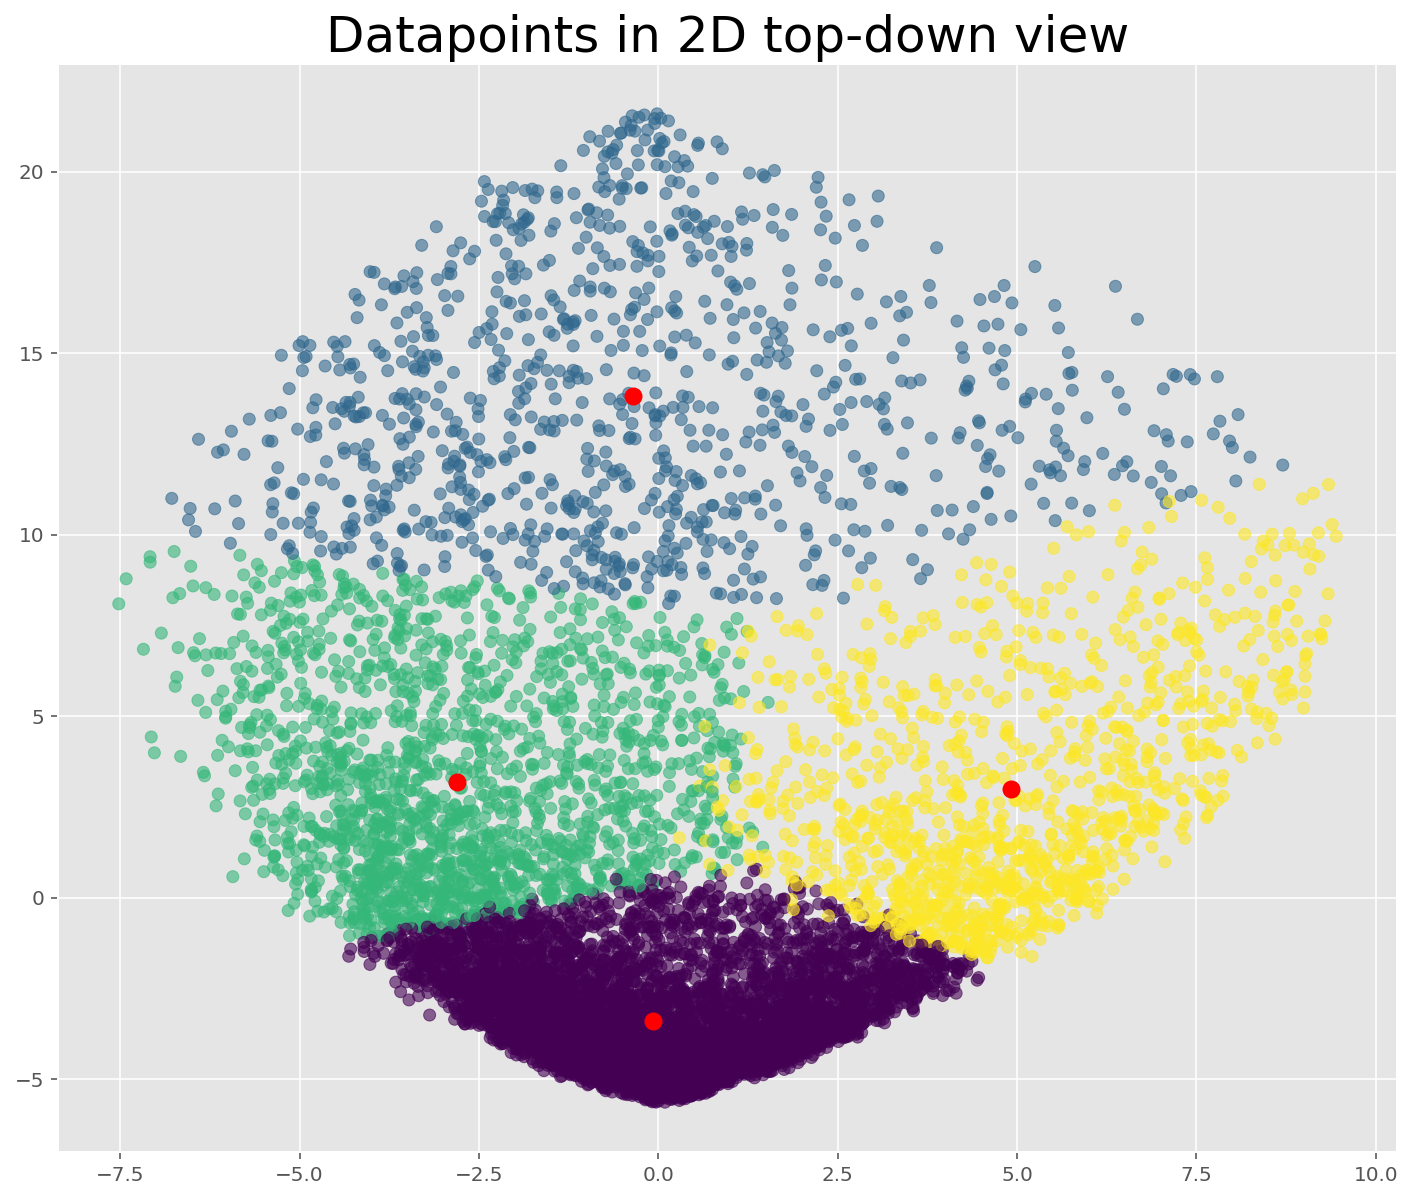

In [56]:
plt.figure(figsize=(12,10))
for index, c in enumerate(centers):
    plt.plot(c[1], c[0], 'o',color='red',alpha=1, markersize=8)
plt.scatter(tocluster[1], tocluster[0], c = c_preds,alpha=0.6)
plt.title('Datapoints in 2D top-down view', fontsize=25)
plt.show()

In [57]:
## Adding the result to our dataframe
movies["cluster"] = c_preds.astype(str)
movies["cluster"] = "Cluster"+movies["cluster"]
movies

movieId                                     title  \
0            1                          Toy Story (1995)   
1            2                            Jumanji (1995)   
2            3                   Grumpier Old Men (1995)   
3            4                  Waiting to Exhale (1995)   
4            5        Father of the Bride Part II (1995)   
...        ...                                       ...   
56364   189363                          Ocean's 8 (2018)   
56516   189713                     BlacKkKlansman (2018)   
57120   191351  To All the Boys I've Loved Before (2018)   
57281   191799                         Extinction (2018)   
57480   192283                  Crazy Rich Asians (2018)   

                                            genres   cluster  
0      Adventure|Animation|Children|Comedy|Fantasy  Cluster1  
1                       Adventure|Children|Fantasy  Cluster1  
2                                   Comedy|Romance  Cluster2  
3                             Comedy|Drama|Romance  Cluster0  
4                                           Comedy  Cluster2  
...                                            ...       ...  
56364                 Action|Comedy|Crime|Thriller  Cluster0  
56516                           Comedy|Crime|Drama  Cluster0  
57120                               Comedy|Romance  Cluster0  
57281                                       Sci-Fi  Cluster0  
57480                                       Comedy  Cluster0  

[10500 rows x 4 columns]

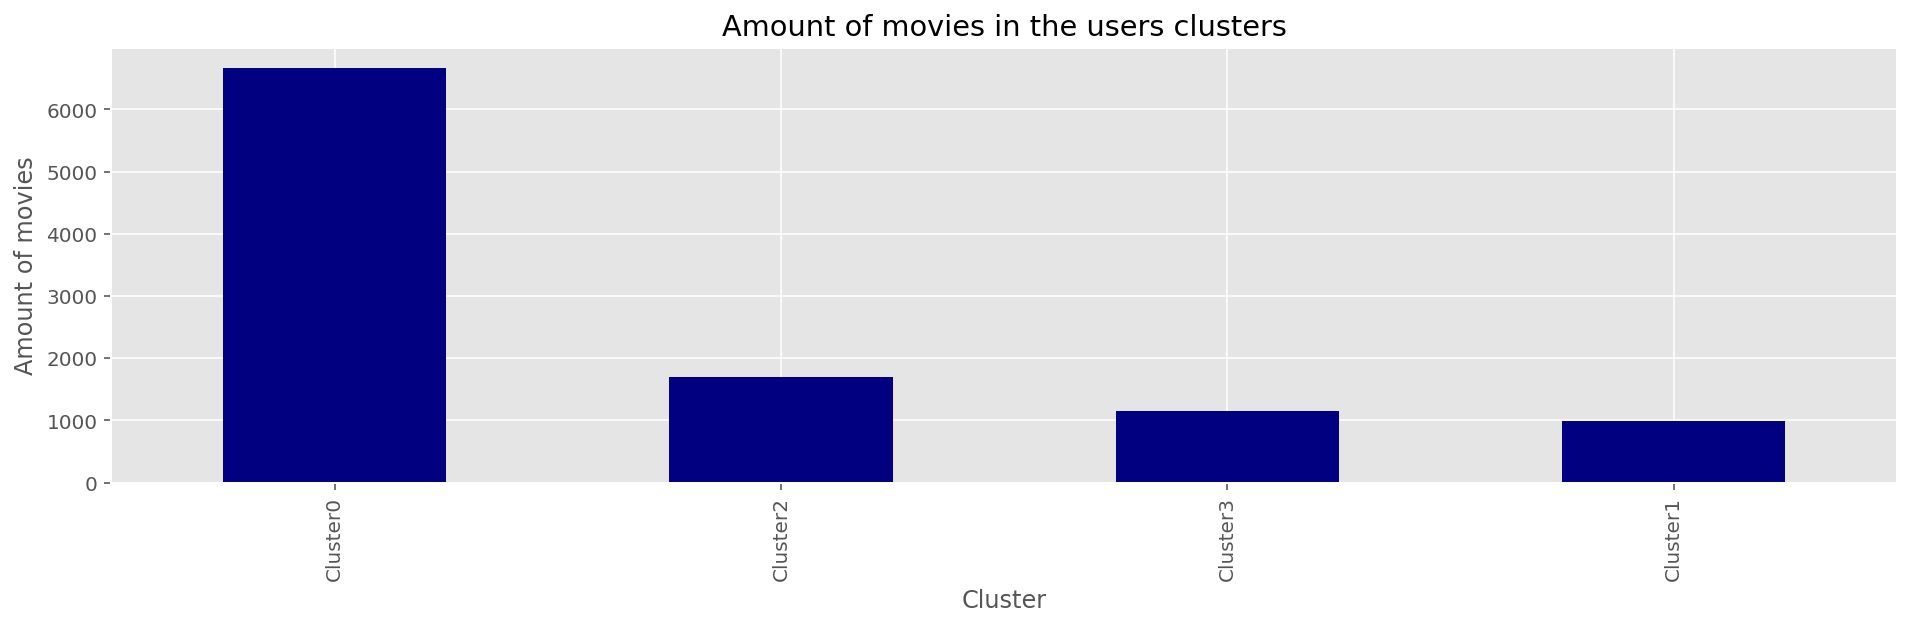

In [58]:
plt.figure(figsize=(16,4))
movies['cluster'].value_counts().plot(color="Navy",kind='bar')

plt.xlabel('Cluster')
plt.ylabel('Amount of movies')
plt.title('Amount of movies in the users clusters')
plt.show()

### Text Vectorization
For the following segment we will be redoing all the steps we did for the preprocessing in the Content-based Filtering section of this document while including the Cluster to the overview column as well.

In [59]:
from gensim.parsing.preprocessing import remove_stopwords

## Leave only letters in columns
movies["title_filtered"] = movies["title"].apply(lambda x: re.sub(r'[^a-zA-Z ]+', ' ', x))
movies["genres_filtered"] = movies["genres"].apply(lambda x: re.sub(r'[^a-zA-Z ]+', ' ', x))
## Combine clusters, genres, title into one column
movies["overview"] = movies["title_filtered"] + " " +  movies["cluster"] + " " + movies["genres_filtered"]
## Remove stopwords to improve accuracy
movies["overview"] = movies["overview"].apply(lambda x: remove_stopwords(x))
## Remove all extra white spaces
movies["overview"] = movies["overview"].apply(lambda x: x.strip())
## Reset the index (Since it is a key factor in navigating the movie dataset)
movies = movies.reset_index().drop(columns={"index"})
movies

movieId                                     title  \
0            1                          Toy Story (1995)   
1            2                            Jumanji (1995)   
2            3                   Grumpier Old Men (1995)   
3            4                  Waiting to Exhale (1995)   
4            5        Father of the Bride Part II (1995)   
...        ...                                       ...   
10495   189363                          Ocean's 8 (2018)   
10496   189713                     BlacKkKlansman (2018)   
10497   191351  To All the Boys I've Loved Before (2018)   
10498   191799                         Extinction (2018)   
10499   192283                  Crazy Rich Asians (2018)   

                                            genres   cluster  \
0      Adventure|Animation|Children|Comedy|Fantasy  Cluster1   
1                       Adventure|Children|Fantasy  Cluster1   
2                                   Comedy|Romance  Cluster2   
3                             Comedy|Drama|Romance  Cluster0   
4                                           Comedy  Cluster2   
...                                            ...       ...   
10495                 Action|Comedy|Crime|Thriller  Cluster0   
10496                           Comedy|Crime|Drama  Cluster0   
10497                               Comedy|Romance  Cluster0   
10498                                       Sci-Fi  Cluster0   
10499                                       Comedy  Cluster0   

                            title_filtered  \
0                              Toy Story     
1                                Jumanji     
2                       Grumpier Old Men     
3                      Waiting to Exhale     
4            Father of the Bride Part II     
...                                    ...   
10495                          Ocean s       
10496                     BlacKkKlansman     
10497  To All the Boys I ve Loved Before     
10498                         Extinction     
10499                  Crazy Rich Asians     

                                   genres_filtered  \
0      Adventure Animation Children Comedy Fantasy   
1                       Adventure Children Fantasy   
2                                   Comedy Romance   
3                             Comedy Drama Romance   
4                                           Comedy   
...                                            ...   
10495                 Action Comedy Crime Thriller   
10496                           Comedy Crime Drama   
10497                               Comedy Romance   
10498                                       Sci Fi   
10499                                       Comedy   

                                                overview  
0      Toy Story Cluster1 Adventure Animation Childre...  
1            Jumanji Cluster1 Adventure Children Fantasy  
2               Grumpier Old Men Cluster2 Comedy Romance  
3           Waiting Exhale Cluster0 Comedy Drama Romance  
4                   Father Bride Part II Cluster2 Comedy  
...                                                  ...  
10495      Ocean s Cluster0 Action Comedy Crime Thriller  
10496         BlacKkKlansman Cluster0 Comedy Crime Drama  
10497  To All Boys I ve Loved Before Cluster0 Comedy ...  
10498                         Extinction Cluster0 Sci Fi  
10499                  Crazy Rich Asians Cluster0 Comedy  

[10500 rows x 7 columns]

In [60]:
## Pass all the rows to a local variable
overview = movies["overview"]
## Initialize TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',min_df=0)
gc.collect()
## Generate a tf-idf vector matrix
tfidf_matrix = tfidf.fit_transform(overview)

###  Modeling: Cosine Similarity

In [61]:
## Compute similarities between movies
cos_similar = linear_kernel(tfidf_matrix , tfidf_matrix)
print(cos_similar.shape)

(10500, 10500)


In [62]:
## Series of movies(indices)
indices = pd.Series(movies.index , index = movies['title']).drop_duplicates()

In [63]:
def get_movies(title):
    ## Check if movie matches exist within our dataset (List)
    validation = indices.loc[indices.index.str.contains(title, case=False)]
    
    if(validation.size > 0):
        ## Take the first title out of our list with movies
        title = (indices.loc[indices.index.str.contains(title, case=False)].index[0])
        
        ## Find movie ID
        idx = indices[title]
        
        ## Get similarity score for provided id
        similar = list(enumerate(cos_similar[idx]))
        
        ## Sort all movies based on similarity scores
        similar = sorted(similar , key = lambda x: x[1] , reverse = True)
        
        # Take the Top 10 closest items
        similar = similar[:11]
        
        ## Set a dictionary state
        state = {"title":[],
                 "distance":[]
        }
        
        ## Add distances and titles to dictionary and return it as a DataFrame
        for i in similar:
            state["title"].append(movies['title'].iloc[i[0]])
            state["distance"].append(i[1])
        return pd.DataFrame.from_dict(state)
    else:
        return "Cannot find movie refering to " + title

### Results
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<img src="https://movieposters2.com/images/655578-b.jpg" style="float:left">

In [64]:
with option_context('display.max_colwidth', 900):
    display(get_movies('Iron man'))

title  distance
0                       Iron Man (2008)  1.000000
1                     Iron Man 2 (2010)  0.891606
2                     Iron Man 3 (2013)  0.773991
3      Man in the Iron Mask, The (1998)  0.699548
4                       Iron Sky (2012)  0.608860
5                Iron Giant, The (1999)  0.604544
6   Man with the Iron Fists, The (2012)  0.599899
7                     Spider-Man (2002)  0.550891
8                 Demolition Man (1993)  0.526438
9                   Spider-Man 2 (2004)  0.516417
10                  Spider-Man 3 (2007)  0.506268

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<img src="https://movieposters2.com/images/653694-b.jpg" style="float:left">

In [65]:
with option_context('display.max_colwidth', 900):
    display(get_movies("The Dark Knight"))

title  distance
0   Batman: The Dark Knight Returns, Part 1 (2012)  1.000000
1   Batman: The Dark Knight Returns, Part 2 (2013)  0.962318
2                            Batman Returns (1992)  0.578605
3                          Dark Knight, The (2008)  0.504606
4                     Batman: Gotham Knight (2008)  0.493186
5                    Dark Knight Rises, The (2012)  0.405742
6                Batman/Superman Movie, The (1998)  0.388248
7                          Superman Returns (2006)  0.378176
8             Transformers: The Last Knight (2017)  0.370644
9                                    Batman (1966)  0.367295
10                                   Batman (1989)  0.354348

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<img src="https://movieposters2.com/images/1073669-b.jpg" style="float:left">

In [66]:
with option_context('display.max_colwidth', 900):
    display(get_movies("Spider-man"))

title  distance
0                   Spider-Man (2002)  1.000000
1                 Spider-Man 3 (2007)  0.919000
2                 Spider-Man 2 (2004)  0.894226
3      Amazing Spider-Man, The (2012)  0.683316
4     The Amazing Spider-Man 2 (2014)  0.645046
5                       Spider (2002)  0.557167
6                     Iron Man (2008)  0.550891
7                   Iron Man 2 (2010)  0.534673
8               Demolition Man (1993)  0.497262
9   Untitled Spider-Man Reboot (2017)  0.493718
10         Along Came a Spider (2001)  0.468677

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Evaluation

Because of the nature of my project, there aren't any precise ways to evaluate my work. For that reason I will be making my own scoring system. Each of the three methods have three results for the same three movies. We will be manually going through the results and rewarding points to each result based on these factors:
* Movie is unrelated - 0 points
* Movie is similar genre (Super hero movie) - 1 point
* Movie is connected to a franchise - 2 points
* Movie is a direct sequel/prequel/spin-off to our input - 3 points

After rating each result we will normalize the values and get a evaluation score for each search.

In [67]:
## Content
res11 = [3,3,3,0,0,0,0,0,2,2] ## Iron man
res12 = [3,3,3,3,2,3,0,0,0,0] ## Batman (The dark knight)
res13 = [3,3,3,1,3,1,1,3,1,0] ## Spider-man
## Collaborative
res21 = [0,2,2,0,1,0,3,3,0,1] ## Iron man
res22 = [1,0,3,0,2,3,0,0,0,0] ## Batman (The dark knight)
res23 = [0,0,0,0,0,1,1,0,1,3] ## Spider-man
## Hybrid
res31 = [3,3,0,0,0,0,2,0,2,2] ## Iron man
res32 = [3,3,3,3,3,3,2,1,3,3] ## Batman (The dark knight)
res33 = [3,3,3,3,0,2,2,0,3,0] ## Spider-man

In [68]:
from sklearn.preprocessing import minmax_scale
## Min-max scale all of our arrays and assign them to their own variables
## Example: res11_normalized
for x in range(1,4):
    for y in range(1,4):
        globals()['res%s%s_normalized' %(x, y)] = minmax_scale(globals()['res%s%s' %(x, y)])

In [69]:
## Calculate the score percentage for each result
for x in range(1, 4):
    for y in range(1, 4):
        globals()['score%s%s' % (x, y)] = (sum(globals()['res%s%s_normalized' % (x, y)]) / len(globals()['res%s%s_normalized' % (x, y)]))*100                                 

### Evaluation results
#### Personal Scoring System

In [70]:
print("Content-based filtering")
print("Ironman - " + "%.2f" % score11 + "%")
print("Batman - " + "%.2f" % score12 + "%")
print("Spider-man - " + "%.2f" % score13 + "%")
print("Average accuracy rating - " + "%.2f" % ((score11+score12+score13)/3) + "%")
print("----------------------------")
print("Collaborative-based filtering")
print("Ironman - " + "%.2f" % score21 + "%")
print("Batman - " + "%.2f" % score22 + "%")
print("Spider-man - " + "%.2f" % score23 + "%")
print("Average accuracy rating - " + "%.2f" % ((score21+score22+score23)/3) + "%")
print("----------------------------")
print("Hybrid filtering model")
print("Ironman - " + "%.2f" % score31 + "%")
print("Batman - " + "%.2f" % score32 + "%")
print("Spider-man - " + "%.2f" % score33 + "%")
print("Average accuracy rating - " + "%.2f" % ((score31+score32+score33)/3) + "%")
print("----------------------------")

Content-based filtering
Ironman - 43.33%
Batman - 56.67%
Spider-man - 63.33%
Average accuracy rating - 54.44%
----------------------------
Collaborative-based filtering
Ironman - 40.00%
Batman - 30.00%
Spider-man - 20.00%
Average accuracy rating - 30.00%
----------------------------
Hybrid filtering model
Ironman - 40.00%
Batman - 85.00%
Spider-man - 63.33%
Average accuracy rating - 62.78%
----------------------------


##### Summary
As we can observe the Collaborative filtering method lags behind the other two methods in every movie search. It also receives significantly lower scores compared to the other methods. This is because the Collaborative filtering methods only relies on user interaction and does not take into account any if the movies' attributes. It however manages to recommend unrelated movies that would be appealing to the end-user

The Content-based Filtering method comes in second in terms of average accuracy rating. It consistently recommends movies in the 40-60% accuracy range. This is due to the fact that it relies very strongly on movie meta-data and other item attributes. It works fairly well but it only recommends items with similar names,genres or years. It does not take into account user interaction.

The Hybrid System takes into account both user reception and movie attributes. That allows it to perform the best out of the 3 solutions with a average accuracy rating of 63%! It manages to recommend both movies that related to the search but also unrelated movies that the user might find appealing. This is showcased extremely well with Batman (The Dark Knight) which has an astonishing 85% accuracy rating in our tests. The Hybrid Systems takes best of both worlds from the previous two filtering methods in order to create a great movie recommendation system. 

# Phase 4
## Conclusion

In this notebook we explored 3 types of recommendation systems Content-based, Collaborative and a Hybrid System, using GroupLens' MovieLens dataset. We discussed the pros and cons of such systems and how they could affect a business and the end user. 

We went over the data, analyzed it's attributes and visualized them. For the Collaborative and Content-based methods, after doing so we went through great lengths to process and format our data into a usable format for our algorithms, by editing it and removing all unwanted and needed inputs. The we used the prepared data to vectorize (if needed) and create a two-dimensional array's from which we calculated the distances between movies.

The Feature Augmentation Hybrid System we created was made to solve the downsides of both methods. Using the data we created a n-dimensional array that we later flattened into only three dimensions, using PCA, to create a simpler but fair representation of our data. After which we clustered all movies into four separate clusters from which we extracted the labels and added them to our original data. Using the new information we vectorized our selected values and made a TF-IDF matrix using them. Said matrix was then later used to calculate the distances between movies and return ten similar movies to the one inputted.

The Hybrid system we created managed to outperform both other methods of recommendation by having either on-par or significantly more accurate results. It is has managed to take the upsides of both methods of recommendation and merge them into one system, while remaining to only require minimal amounts of input data. This would make it ideal to use in any application or software that requires movie recommendations.

<img src="https://ourcodeworld.com/public-media/articles/articleocw-5e02cb556727f.webp">